In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


# **Importing Python Libraries.**
* Seaborn is a Python library for creating statistical graphics.
* Matplotlib is a powerful plotting library for creating customizable visualizations.
* Pandas is a data manipulation library, that simplifies plotting from dataframes.

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display_html
from itertools import chain,cycle

# **Loading Data**

In [147]:
df=pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv',encoding='latin')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


# **Exploring Data**

The df.info() function provides a concise summary of a Pandas DataFrame. It includes information about the following aspects:

* Index: The range of index values (e.g., row count and data type).
* Columns: Column names, non-null count, and data type.
* Memory Usage: The memory consumed by the DataFrame.
* Data Types: The data type of each column.
* Non-null Count: The number of non-null values in each column.
* Memory Usage: The total memory usage.
* This summary is helpful for understanding the structure and content of your DataFrame.

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


This Table has 25 Columns and 2823 Rows
* int64 means intiger number
* float64 means decimal number
* object could be a code, name, adress, description.

We could divide these information into 3 Categories.
* Product Info: PRICEEACH, PRODUCTLINE, MSRP, PRODUCTCODE
* Order Info: ORDERNUMBER, QUANTITYORDERED, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, QTR_ID, MONTH_ID, YEAR_ID, DEALSIZE
* Customers Info: CUSTOMERNAME, PHONE, ADDRESSLINE1, ADDRESSLINE2, CITY, STATE, POSTALCODE, COUNTRY, TERRITORY, CONTACTLASTNAME, CONTACTFIRSTNAME

In [149]:
#The df.isnull().sum() function provides the count of missing (null or NaN) values for each column in a Pandas DataFrame.

df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

If we combare the df.isnull().sum() and df.info(), we could see that both give us the same information regarding the missing Values.
* df.isnull().sum() shows us the null
* df.info() shows us the non-null

Out of 2823 Rows are missing:
* ADDRESSLINE2 *2521* 
* STATE *1486*
* POSTALCODE *76*
* TERRITORY *1074*

ADDRESSLINE2 and POSTALCODE are odd information for our Analysis. But we will investigate a bit further the TERRITORY and STATE data.

# Exploring TERRITORY

In [150]:
# The df.groupby("COUNTRY").agg(list) function groups rows in a Pandas DataFrame based on the unique values in the “COUNTRY” column. It then aggregates the other columns (excluding the grouping column) into lists for each group.

df_Ter= df[["COUNTRY", "TERRITORY"]]
df_Ter= df_Ter.groupby("COUNTRY").agg(list)
df_Ter.reset_index()

,COUNTRY,TERRITORY
0,Australia,"[APAC, APAC, APAC, APAC, APAC, APAC, APAC, APA..."
1,Austria,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
2,Belgium,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
3,Canada,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,Denmark,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
5,Finland,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
6,France,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
7,Germany,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
8,Ireland,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
9,Italy,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."


From the Above we observe 2 things.
1. Canada and the USA have missing values.
1. Singapore,Phillipines and Japan have incorrect naming.

# Editing TERRITORY

We are going to:
* Add the AMER or Canada and the USA, as America.
* Replace Japan with APAC, as Asia-Pacific.

In [151]:
#The df.fillna('') function in Pandas is used to replace missing (NaN or null) values in a DataFrame with a specified value.
#The .replace() function in Python is a string method that returns a new string with all occurrences of a specified substring replaced by another specified substring.

df['TERRITORY']=df['TERRITORY'].fillna('AMER')
df['TERRITORY'] = df['TERRITORY'].replace('Japan', 'APAC')

df_Ter= df[["COUNTRY", "TERRITORY"]]
df_Ter= df_Ter.groupby("COUNTRY").agg(list)
df_Ter.reset_index()

,COUNTRY,TERRITORY
0,Australia,"[APAC, APAC, APAC, APAC, APAC, APAC, APAC, APA..."
1,Austria,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
2,Belgium,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
3,Canada,"[AMER, AMER, AMER, AMER, AMER, AMER, AMER, AME..."
4,Denmark,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
5,Finland,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
6,France,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
7,Germany,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
8,Ireland,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."
9,Italy,"[EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EMEA, EME..."


# Exploring STATE

In [152]:
df_State= df[["COUNTRY", "STATE"]]
df_State= df_State.groupby("COUNTRY").agg(list)
df_State.reset_index()

,COUNTRY,STATE
0,Australia,"[Victoria, NSW, Queensland, NSW, Victoria, NSW..."
1,Austria,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,Belgium,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,Canada,"[BC, Quebec, Quebec, BC, BC, Quebec, BC, BC, Q..."
4,Denmark,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
5,Finland,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
6,France,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
7,Germany,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
8,Ireland,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
9,Italy,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


From the above Table we could see that the missing State values are from European Countries. Probably States is not useful Data for our work.

# **Analysing and Visualising Data**

# **1.The Products**

Finding the Average, Min and Max Prices and Creating a Table.

In [153]:
df_Product_Price_Average= df[["PRODUCTLINE", "PRICEEACH"]]
df_Product_Price_Average= df_Product_Price_Average.groupby("PRODUCTLINE").mean().round(2)
df_Product_Price_Average.rename(columns={'PRICEEACH':'Average Price'},inplace=True)

df_Product_Price_Max= df[["PRODUCTLINE", "PRICEEACH"]]
df_Product_Price_Max= df_Product_Price_Max.groupby("PRODUCTLINE").max()
df_Product_Price_Max.rename(columns={'PRICEEACH':'Max Price'},inplace=True)

df_Product_Price_Min= df[["PRODUCTLINE", "PRICEEACH"]]
df_Product_Price_Min= df_Product_Price_Min.groupby("PRODUCTLINE").min()
df_Product_Price_Min.rename(columns={'PRICEEACH':'Min Price'},inplace=True)

df_Product_Price = pd.merge(df_Product_Price_Min, df_Product_Price_Average, on="PRODUCTLINE")
df_Product_Price = pd.merge(df_Product_Price, df_Product_Price_Max, on="PRODUCTLINE")
df_Product_Price.sort_values(by='Average Price', ascending=True).reset_index()

,PRODUCTLINE,Min Price,Average Price,Max Price
0,Trains,36.07,75.65,100.0
1,Vintage Cars,26.88,78.15,100.0
2,Planes,40.22,81.74,100.0
3,Motorcycles,32.59,83.00,100.0
4,Ships,43.68,83.86,100.0
5,Classic Cars,28.29,87.34,100.0
6,Trucks and Buses,35.71,87.53,100.0


# The MSRP
The Manufacturer’s Suggested Retail Price, or MSRP, is the price recommended by a product’s manufacturer for retail sale. Often referred to as the “sticker price” or “list price,” it acts as a benchmark for retailers to set their prices and for consumers to compare costs between sellers. While retailers are not bound to adhere to the MSRP and may adjust prices based on demand, inventory, or market conditions, it remains a useful tool for standardizing prices across various locations. In sales, particularly in the automotive industry, the MSRP can serve as a starting point for price negotiations, reflecting production costs, market demand, competition, and profit margins.

In [154]:
#MSRP Table.
df_Product_MSRP= df[["PRODUCTLINE", "MSRP"]]
df_Product_MSRP= df_Product_MSRP.groupby("PRODUCTLINE").mean().round(2)
df_Product_MSRP.rename(columns={'MSRP':'Average MSRP'},inplace=True)

df_Product_Price = pd.merge(df_Product_Price, df_Product_MSRP, on="PRODUCTLINE")
df_Product_Price.sort_values(by='Average Price', ascending=True).reset_index()


,PRODUCTLINE,Min Price,Average Price,Max Price,Average MSRP
0,Trains,36.07,75.65,100.0,72.99
1,Vintage Cars,26.88,78.15,100.0,86.46
2,Planes,40.22,81.74,100.0,88.77
3,Motorcycles,32.59,83.00,100.0,97.07
4,Ships,43.68,83.86,100.0,86.13
5,Classic Cars,28.29,87.34,100.0,119.89
6,Trucks and Buses,35.71,87.53,100.0,102.47


Bar Chart presenting the products' prices.

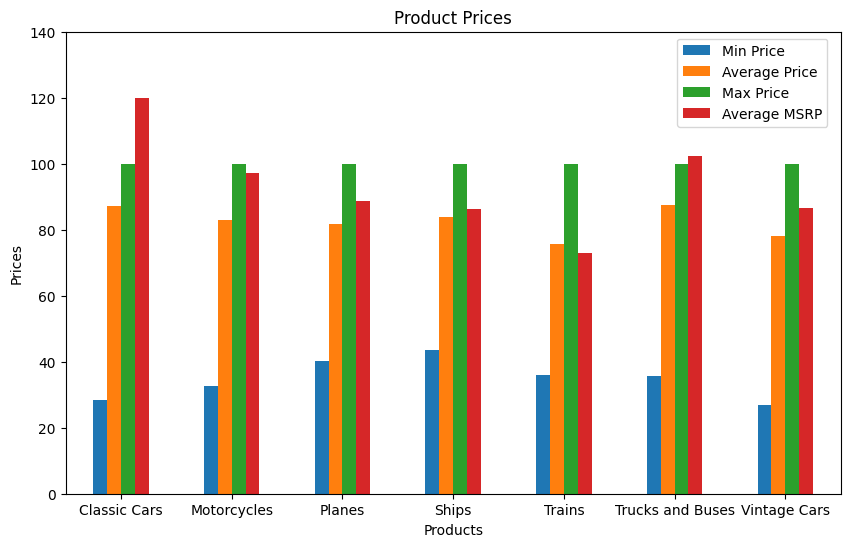

In [155]:
df_Product_Price.plot(kind='bar', figsize=(10,6))

plt.xlabel('Products')
plt.ylabel('Prices')
plt.title("Product Prices")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(0.78, 1), loc='upper left')
plt.ylim(bottom=0, top=140)

plt.savefig("Product_Prices.png")
plt.show()

Finding the Average Sales and Quantity Orders, the Price Difference and the Percentage and Create a Table.

In [156]:
#Finding the Differenceand the Reduction % between the Average Price and Average MSRP.
df_Product_Price_MSRP = pd.merge(df_Product_Price_Average, df_Product_MSRP, on="PRODUCTLINE")
df_Product_Price_MSRP['Difference']= df_Product_Price_MSRP['Average Price']- df_Product_Price_MSRP['Average MSRP']
df_Product_Price_MSRP['Reduction %'] = ((df_Product_Price_MSRP['Average Price'] - df_Product_Price_MSRP['Average MSRP']) / df_Product_Price_MSRP['Average MSRP']) * 100
#SALES Table
df_Product_SALES= df[["PRODUCTLINE", "SALES"]]
df_Product_SALES= df_Product_SALES.groupby("PRODUCTLINE").sum().round(2)
#QUANTITYORDERS Table
df_Product_Orders= df[["PRODUCTLINE", "QUANTITYORDERED"]]
df_Product_Orders= df_Product_Orders.groupby("PRODUCTLINE").sum().round(2)
#Merging the Tables
df_Compare_MSRP =pd.merge(df_Product_Price_MSRP,df_Product_SALES, on="PRODUCTLINE")
df_Compare_MSRP = pd.merge(df_Compare_MSRP, df_Product_Orders, on="PRODUCTLINE")

df_Compare_MSRP.sort_values(by='Difference', ascending=True).reset_index().round(2)

,PRODUCTLINE,Average Price,Average MSRP,Difference,Reduction %,SALES,QUANTITYORDERED
0,Classic Cars,87.34,119.89,-32.55,-27.15,3919615.66,33992
1,Trucks and Buses,87.53,102.47,-14.94,-14.58,1127789.84,10777
2,Motorcycles,83.00,97.07,-14.07,-14.49,1166388.34,11663
3,Vintage Cars,78.15,86.46,-8.31,-9.61,1903150.84,21069
4,Planes,81.74,88.77,-7.03,-7.92,975003.57,10727
5,Ships,83.86,86.13,-2.27,-2.64,714437.13,8127
6,Trains,75.65,72.99,2.66,3.64,226243.47,2712


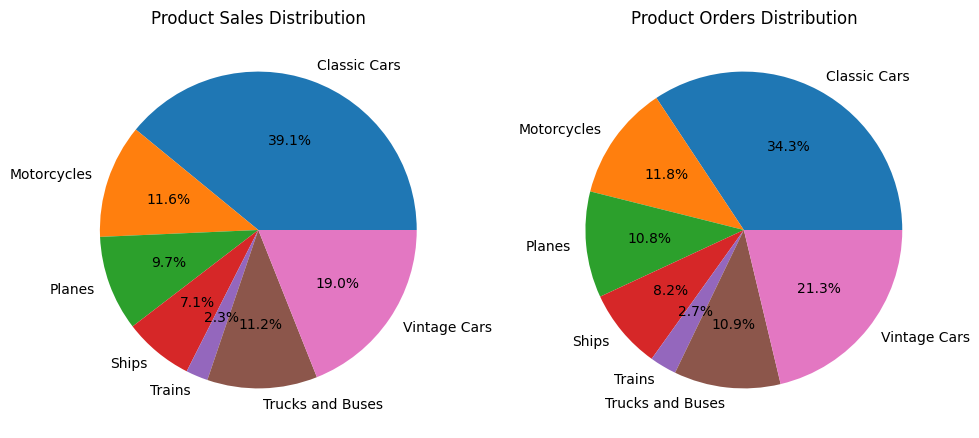

In [157]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))

sales_data = df_Compare_MSRP['SALES']
orders_data= df_Compare_MSRP['QUANTITYORDERED']
labels = df_Compare_MSRP.index  # or df_Compare_MSRP['PRODUCTLINE'] if it's a column

axs[0].pie(sales_data, labels=labels, autopct='%1.1f%%')
axs[0].set_title('Product Sales Distribution')

axs[1].pie(orders_data, labels=labels, autopct='%1.1f%%')
axs[1].set_title('Product Orders Distribution')

plt.tight_layout()

plt.savefig("Orders_Sales_Distribution.png")
plt.show()

We can see that only the Average Price of Trains is 3.64 higher than the Average MSRP price. The Average Prices of the rest of the Products is lower from the Average MSRP, with Classic Cars 27.15%, and next the Trucks and Buses and Motorcicles with 14.5%.

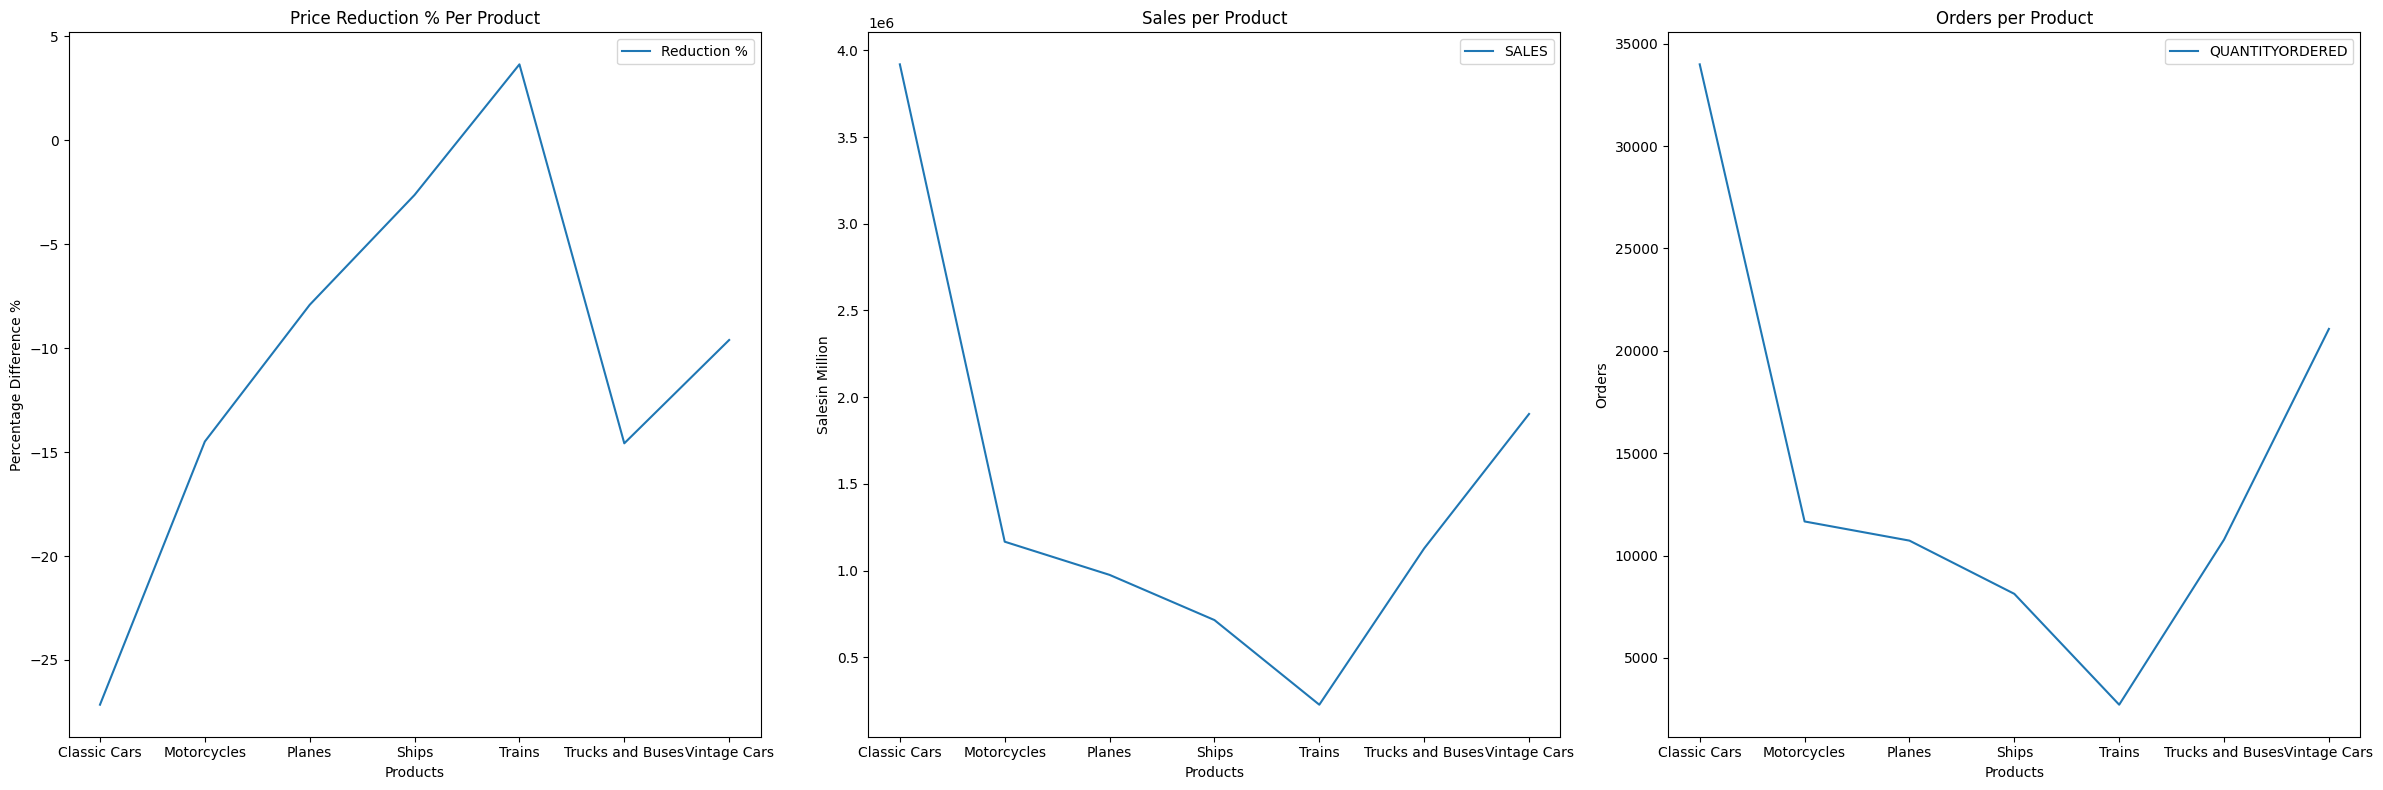

In [158]:
fig, axs = plt.subplots(1,3,figsize=(24, 8))

df_Compare_MSRP[['Reduction %']].plot(kind='line',ax=axs[0])
axs[0].set_xlabel('Products')
axs[0].set_ylabel('Percentage Difference %')
axs[0].set_title("Price Reduction % Per Product")

df_Compare_MSRP[['SALES']].plot(kind='line',ax=axs[1])
axs[1].set_xlabel('Products')
axs[1].set_ylabel('Salesin Million')
axs[1].set_title("Sales per Product")

df_Compare_MSRP[['QUANTITYORDERED']].plot(kind='line',ax=axs[2])
axs[2].set_xlabel('Products')
axs[2].set_ylabel('Orders')
axs[2].set_title("Orders per Product")

plt.tight_layout()

plt.savefig("Product_Corrolation.png")
plt.show()

I created a Table with the Average Prices per Product Code, and culculate the difference (Reduction %) from the Average MSRP.

In [159]:
F= df.groupby("PRODUCTCODE").agg({
    'SALES': 'sum',
    'QUANTITYORDERED':'sum',
    'PRICEEACH':'mean',
    'MSRP':'mean',
    'PRODUCTLINE':'first'
}).round(2).sort_values(by='SALES', ascending=False).reset_index()
F['Reduction %'] = ((F['PRICEEACH'] - F['MSRP']) / F['MSRP']) * 100
F=F.round(2).sort_values(by='Reduction %', ascending=False)
F

,PRODUCTCODE,SALES,QUANTITYORDERED,PRICEEACH,MSRP,PRODUCTLINE,Reduction %
102,S24_1937,47981.09,844,43.99,33.0,Vintage Cars,33.30
103,S24_2840,47235.48,983,44.01,35.0,Classic Cars,25.74
76,S18_4668,71323.52,951,61.63,50.0,Vintage Cars,23.26
105,S24_2972,46515.92,912,45.50,37.0,Classic Cars,22.97
88,S72_3212,61064.10,927,63.87,54.0,Ships,18.28
...,...,...,...,...,...,...,...
5,S12_3891,145332.04,921,96.95,173.0,Classic Cars,-43.96
2,S10_4698,170401.07,921,98.59,193.0,Motorcycles,-48.92
9,S12_1099,137177.01,838,96.46,194.0,Classic Cars,-50.28
1,S10_1949,191073.03,961,100.00,214.0,Classic Cars,-53.27


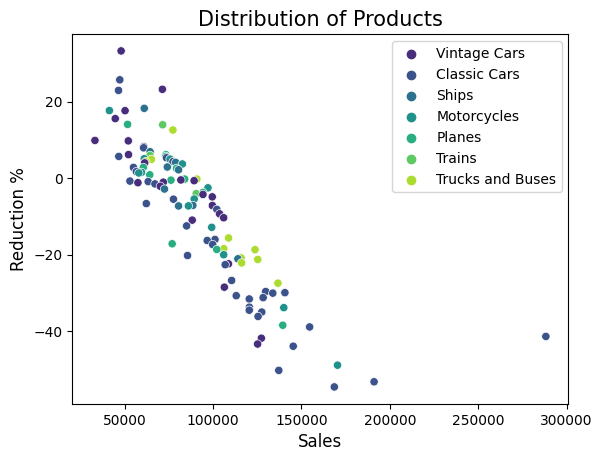

In [160]:
sns.scatterplot(x='SALES',y='Reduction %',hue='PRODUCTLINE',data=F,palette='viridis')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Reduction %', fontsize=12)
plt.title("Distribution of Products", fontsize=15)
plt.legend(bbox_to_anchor=(0.63, 1), loc='upper left')
plt.xticks(rotation=0)

plt.savefig("Reduction_Distribution.png")
plt.show()

We see that as higher the Sales as higher the Reductions up to 55%. But also, The Lowest sales have charge up to 33%.

# Correlations between Product Sales, Orders and Reduction

In [161]:
Cor_01=df_Compare_MSRP[['SALES', 'QUANTITYORDERED']].corr()
Cor_02=df_Compare_MSRP[['SALES', 'Reduction %']].corr()
Cor_03=df_Compare_MSRP[['QUANTITYORDERED', 'Reduction %']].corr()

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(Cor_01, Cor_02, Cor_03)

,SALES,QUANTITYORDERED
SALES,1.000000,0.990174
QUANTITYORDERED,0.990174,1.000000
,SALES,Reduction %
SALES,1.000000,-0.879028
Reduction %,-0.879028,1.000000
,QUANTITYORDERED,Reduction %
QUANTITYORDERED,1.000000,-0.853063
Reduction %,-0.853063,1.000000


We can see that the Correlation Between the Average Sales and Average Quantity Orders are almost 1, and that makes sense. But also we see that Reduction (between the Average Product Price and Average MSRP) and the Sales|Quantuity Orders is almost -0.88|0.85. That shows a trent, that a product meets high sales, its price goes lower than the MSRP. So Classic Cars that have the heighest Orders have also the Biggest Reduction and Trains that have the least orders actually theis price is increased above the MSRP.

# **2.Sales and Orders per Year**

In [162]:
df_2003=df[df['YEAR_ID']==2003]
df_2004=df[df['YEAR_ID']==2004]
df_2005=df[df['YEAR_ID']==2005]

#2003
df_2003_Sales=pd.pivot_table(
    data= df_2003,
    values='SALES',
    index='MONTH_ID',
    aggfunc='sum'
)

df_2003_Orders=pd.pivot_table(
    data= df_2003,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    aggfunc='sum'
)

df_2003_Compare = pd.merge(df_2003_Sales, df_2003_Orders, on="MONTH_ID") 

df_2003_Compare.rename(columns={'SALES': 'Sales 2003'}, inplace=True)
df_2003_Compare.rename(columns={'QUANTITYORDERED': 'Orders 2003'}, inplace=True)

#2004
df_2004_Sales=pd.pivot_table(
    data= df_2004,
    values='SALES',
    index='MONTH_ID',
    aggfunc='sum'
)

df_2004_Orders=pd.pivot_table(
    data= df_2004,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    aggfunc='sum'
)

df_2004_Compare = pd.merge(df_2004_Sales, df_2004_Orders, on="MONTH_ID") 

df_2004_Compare.rename(columns={'SALES': 'Sales 2004'}, inplace=True)
df_2004_Compare.rename(columns={'QUANTITYORDERED': 'Orders 2004'}, inplace=True)

#2005
df_2005_Sales=pd.pivot_table(
    data= df_2005,
    values='SALES',
    index='MONTH_ID',
    aggfunc='sum'
)

df_2005_Orders=pd.pivot_table(
    data= df_2005,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    aggfunc='sum'
)

df_2005_Compare = pd.merge(df_2005_Sales, df_2005_Orders, on="MONTH_ID") 

df_2005_Compare.rename(columns={'SALES': 'Sales 2005'}, inplace=True)
df_2005_Compare.rename(columns={'QUANTITYORDERED': 'Orders 2005'}, inplace=True)

df_Sales_AllYears = pd.merge(df_2003_Compare, df_2004_Compare, on='MONTH_ID')
df_Sales_AllYears = pd.merge(df_Sales_AllYears, df_2005_Compare, on='MONTH_ID',how='outer')
df_Sales_AllYears

,Sales 2003,Orders 2003,Sales 2004,Orders 2004,Sales 2005,Orders 2005
MONTH_ID,,,,,,
1,129753.60,1357,316577.42,3245,339543.42,3395.0
2,140836.19,1449,311419.53,3061,358186.18,3393.0
3,174504.90,1755,205733.73,1978,374262.76,3852.0
4,201609.55,1993,206148.12,2077,261633.29,2634.0
5,192673.11,2017,273438.39,2618,457861.06,4357.0
6,168082.56,1649,286674.22,2971,NaN,NaN
7,187731.88,1725,327144.09,3174,NaN,NaN
8,197809.30,1974,461501.27,4564,NaN,NaN
9,263973.36,2510,320750.91,3171,NaN,NaN


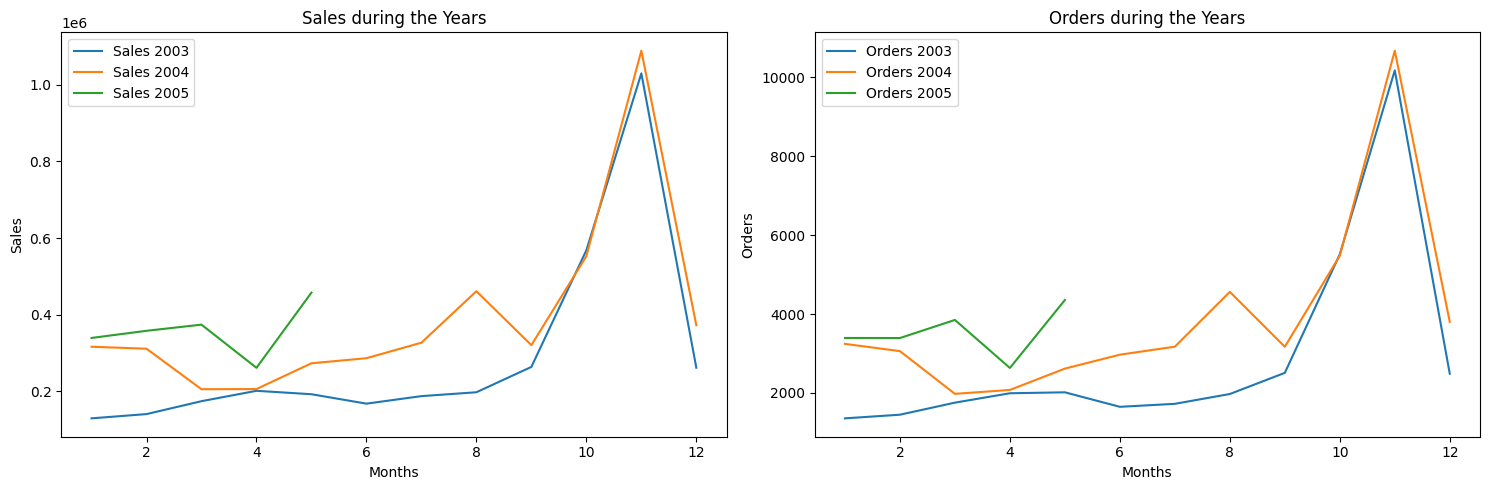

In [163]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))

df_Sales_AllYears[['Sales 2003','Sales 2004','Sales 2005']].plot(kind='line',ax=axs[0])
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Sales')
axs[0].set_title("Sales during the Years")

df_Sales_AllYears[['Orders 2003','Orders 2004','Orders 2005']].plot(kind='line',ax=axs[1])
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Orders')
axs[1].set_title("Orders during the Years")

plt.tight_layout()

plt.savefig("Sales_Orders_per_Year.png")
plt.show()

# Correlations Orders Vs Sales per Year

In [164]:
Cor_2003 = df_2003_Compare[['Sales 2003', 'Orders 2003']].corr()
Cor_2004 = df_2004_Compare[['Sales 2004', 'Orders 2004']].corr()
Cor_2005 = df_2005_Compare[['Sales 2005', 'Orders 2005']].corr()

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(Cor_2003,Cor_2004,Cor_2005)

,Sales 2003,Orders 2003
Sales 2003,1.000000,0.999541
Orders 2003,0.999541,1.000000
,Sales 2004,Orders 2004
Sales 2004,1.000000,0.999489
Orders 2004,0.999489,1.000000
,Sales 2005,Orders 2005
Sales 2005,1.000000,0.982462
Orders 2005,0.982462,1.000000


# **Standart Deviation**
From Descibe Table for 2003|2004|2005 we get Q1|Q2|Q3|Q4 for Orders and Sales.Now we need to find the Interquartile Rang(IQR) and Identify Outliers.

In [165]:
desc_2003=df_2003[['QUANTITYORDERED', 'SALES']].describe().round(2)
desc_2004=df_2004[['QUANTITYORDERED', 'SALES']].describe().round(2)
desc_2005=df_2005[['QUANTITYORDERED', 'SALES']].describe().round(2)

# Concatenate horizontally
combined_desc = pd.concat([desc_2003, desc_2004, desc_2005], axis=1)

# Rename columns with titles
combined_desc.columns = ['2003 Orders', '2003 Sales', '2004 Orders', '2004 Sales', '2005 Orders', '2005 Sales']

combined_desc

,2003 Orders,2003 Sales,2004 Orders,2004 Sales,2005 Orders,2005 Sales
count,1000.00,1000.00,1345.00,1345.00,478.00,478.00
mean,34.61,3516.98,34.81,3512.39,36.88,3747.88
std,9.11,1763.68,8.97,1775.28,12.53,2151.80
min,20.00,710.20,20.00,577.60,6.00,482.13
25%,27.00,2173.94,27.00,2220.72,28.00,2158.90
50%,34.00,3210.10,35.00,3141.57,36.00,3316.82
75%,43.00,4483.45,42.00,4417.38,45.00,4846.52
max,50.00,11279.20,55.00,12536.50,97.00,14082.80


# Orders

# 2003

In [166]:
#Assign to to Q1,Q2,Q3 the first quartile (Q1), the median, and the third quartile (Q3).
Q1_2003_Orders=df_2003['QUANTITYORDERED'].quantile(0.25)
Q2_2003_Orders=df_2003['QUANTITYORDERED'].quantile(0.5)
Q3_2003_Orders=df_2003['QUANTITYORDERED'].quantile(0.75)

#Interquartile Rang(IQR)
IQR_2003_Orders = Q3_2003_Orders-Q1_2003_Orders

#Lower fence
Lower_Fence_2003_Orders = Q1_2003_Orders-1.5*IQR_2003_Orders

#Upper fence
Upper_Fence_2003_Orders = Q3_2003_Orders+1.5*IQR_2003_Orders

#Outlier
Outlier_2003_Orders = df_2003[(df_2003['QUANTITYORDERED']<Lower_Fence_2003_Orders) |(df_2003['QUANTITYORDERED']>Upper_Fence_2003_Orders)]
Outlier_2003_Orders

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


*When there are no data points outside the lower and upper fences, it means that there are no outliers in our df_2003['QUANTITYORDERED'] data according to the IQR method. This suggests that all the data points fall within a range that is considered normal variation for your dataset. It’s a sign that our data is relatively uniform without extreme values that deviate significantly from the rest.*

# 2004

In [167]:
#Assign to to Q1,Q2,Q3 the first quartile (Q1), the median, and the third quartile (Q3).
Q1_2004_Orders=df_2004['QUANTITYORDERED'].quantile(0.25)
Q2_2004_Orders=df_2004['QUANTITYORDERED'].quantile(0.5)
Q3_2004_Orders=df_2004['QUANTITYORDERED'].quantile(0.75)

#Interquartile Rang(IQR)
IQR_2004_Orders = Q3_2004_Orders-Q1_2004_Orders

#Lower fence
Lower_Fence_2004_Orders = Q1_2004_Orders-1.5*IQR_2004_Orders

#Upper fence
Upper_Fence_2004_Orders = Q3_2004_Orders+1.5*IQR_2004_Orders

#Outlier
Outlier_2004_Orders = df_2004[(df_2004['QUANTITYORDERED']<Lower_Fence_2004_Orders) |(df_2004['QUANTITYORDERED']>Upper_Fence_2004_Orders)]
Outlier_2004_Orders

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


*When there are no data points outside the lower and upper fences, it means that there are no outliers in our df_2004['QUANTITYORDERED'] data according to the IQR method. This suggests that all the data points fall within a range that is considered normal variation for your dataset. It’s a sign that our data is relatively uniform without extreme values that deviate significantly from the rest.*

# 2005

In [168]:
#Assign to to Q1,Q2,Q3 the first quartile (Q1), the median, and the third quartile (Q3).
Q1_2005_Orders=df_2005['QUANTITYORDERED'].quantile(0.25)
Q2_2005_Orders=df_2005['QUANTITYORDERED'].quantile(0.5)
Q3_2005_Orders=df_2005['QUANTITYORDERED'].quantile(0.75)

#Interquartile Rang(IQR)
IQR_2005_Orders = Q3_2005_Orders-Q1_2005_Orders

#Lower fence
Lower_Fence_2005_Orders = Q1_2005_Orders-1.5*IQR_2005_Orders

#Upper fence
Upper_Fence_2005_Orders = Q3_2005_Orders+1.5*IQR_2005_Orders

#Outlier
Outlier_2005_Orders = df_2005[(df_2005['QUANTITYORDERED']<Lower_Fence_2005_Orders) |(df_2005['QUANTITYORDERED']>Upper_Fence_2005_Orders)]
Outlier_2005_Orders

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
418,10405,97,93.28,5,9048.16,4/14/2005 0:00,Shipped,2,4,2005,...,"24, place Kluber",NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large
598,10407,76,100.00,2,14082.80,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,AMER,Frick,Sue,Large
1714,10407,76,94.50,6,7182.00,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,AMER,Frick,Sue,Large
1995,10405,76,100.00,3,11739.70,4/14/2005 0:00,Shipped,2,4,2005,...,"24, place Kluber",NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large
2586,10401,85,88.75,10,7543.75,4/3/2005 0:00,On Hold,2,4,2005,...,7476 Moss Rd.,NaN,Newark,NJ,94019,USA,AMER,Brown,William,Large
2689,10401,77,92.00,9,7084.00,4/3/2005 0:00,On Hold,2,4,2005,...,7476 Moss Rd.,NaN,Newark,NJ,94019,USA,AMER,Brown,William,Large


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


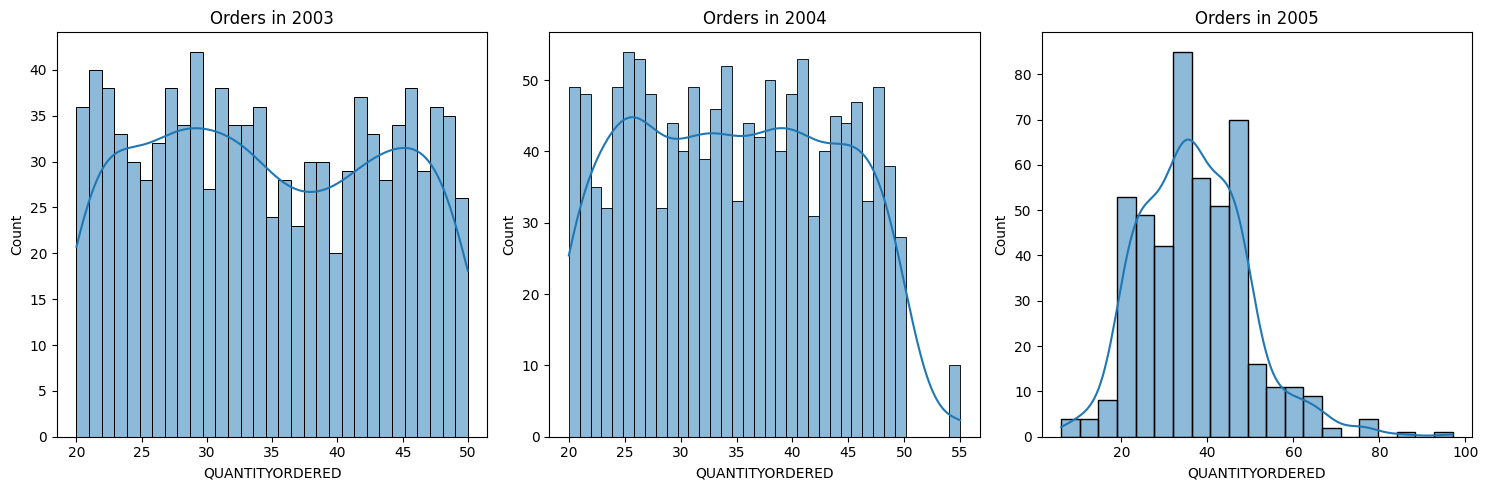

In [169]:
#calculating the optimal number of bins.
data_points_2003_Orders = len(df_2003['QUANTITYORDERED'])
bins_2003_Orders = int(np.sqrt(data_points_2003_Orders))

data_points_2004_Orders = len(df_2004['QUANTITYORDERED'])
bins_2004_Orders = int(np.sqrt(data_points_2004_Orders))

data_points_2005_Orders = len(df_2005['QUANTITYORDERED'])
bins_2005_Orders = int(np.sqrt(data_points_2005_Orders))

#Generating the Tables
fig, axs = plt.subplots(1,3,figsize=(15, 5))

sns.histplot(df_2003['QUANTITYORDERED'],kde=True,bins=bins_2003_Orders,ax=axs[0])
sns.histplot(df_2004['QUANTITYORDERED'],kde=True,bins=bins_2004_Orders,ax=axs[1])
sns.histplot(df_2005['QUANTITYORDERED'],kde=True,bins=bins_2005_Orders,ax=axs[2])

#Titles
axs[0].set_title('Orders in 2003')
axs[1].set_title('Orders in 2004')
axs[2].set_title('Orders in 2005')

plt.tight_layout()

plt.savefig("Orders_STD.png")
plt.show()

# Sales

In [170]:
#Assign to to Q1,Q2,Q3 the first quartile (Q1), the median, and the third quartile (Q3).
Q1_2003_Sales=df_2003['SALES'].quantile(0.25)
Q2_2003_Sales=df_2003['SALES'].quantile(0.5)
Q3_2003_Sales=df_2003['SALES'].quantile(0.75)

#Interquartile Rang(IQR)
IQR_2003_Sales = Q3_2003_Sales-Q1_2003_Sales

#Lower fence
Lower_Fence_2003_Sales = Q1_2003_Sales-1.5*IQR_2003_Sales

#Upper fence
Upper_Fence_2003_Sales = Q3_2003_Sales+1.5*IQR_2003_Sales

#Outlier
Outlier_2003_Sales = df_2003[(df_2003['SALES']<Lower_Fence_2003_Sales) |(df_2003['SALES']>Upper_Fence_2003_Sales)]
Outlier_2003_Sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
30,10150,45,100.0,8,10993.50,9/19/2003 0:00,Shipped,3,9,2003,...,"Bronz Sok., Bronz Apt. 3/6 Tesvikiye",NaN,Singapore,NaN,79903,Singapore,APAC,Natividad,Eric,Large
32,10174,34,100.0,4,8014.82,11/6/2003 0:00,Shipped,4,11,2003,...,31 Duncan St. West End,NaN,South Brisbane,Queensland,4101,Australia,APAC,Calaghan,Tony,Large
35,10206,47,100.0,6,9064.89,12/5/2003 0:00,Shipped,4,12,2003,...,1900 Oak St.,NaN,Vancouver,BC,V3F 2K1,Canada,AMER,Tannamuri,Yoshi,Large
81,10120,46,100.0,2,9264.86,4/29/2003 0:00,Shipped,2,4,2003,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Large
86,10180,41,100.0,11,8892.90,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Large
87,10188,45,100.0,3,8714.70,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Large
88,10201,49,100.0,4,8065.89,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,AMER,Murphy,Julie,Large
163,10135,42,100.0,7,8008.56,7/2/2003 0:00,Shipped,3,7,2003,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,AMER,Nelson,Valarie,Large
164,10147,48,100.0,7,9245.76,9/5/2003 0:00,Shipped,3,9,2003,...,7825 Douglas Av.,NaN,Brickhaven,MA,58339,USA,AMER,Nelson,Allen,Large
165,10159,41,100.0,2,8296.35,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,AMER,Brown,Julie,Large


In [171]:
#Assign to to Q1,Q2,Q3 the first quartile (Q1), the median, and the third quartile (Q3).
Q1_2004_Sales=df_2004['SALES'].quantile(0.25)
Q2_2004_Sales=df_2004['SALES'].quantile(0.5)
Q3_2004_Sales=df_2004['SALES'].quantile(0.75)

#Interquartile Rang(IQR)
IQR_2004_Sales = Q3_2004_Sales-Q1_2004_Sales

#Lower fence
Lower_Fence_2004_Sales = Q1_2004_Sales-1.5*IQR_2004_Sales

#Upper fence
Upper_Fence_2004_Sales = Q3_2004_Sales+1.5*IQR_2004_Sales

#Outlier
Outlier_2004_Sales = df_2004[(df_2004['SALES']<Lower_Fence_2004_Sales) |(df_2004['SALES']>Upper_Fence_2004_Sales)]
Outlier_2004_Sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
20,10341,41,100.0,9,7737.93,11/24/2004 0:00,Shipped,4,11,2004,...,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Large
41,10280,34,100.0,2,8014.82,8/17/2004 0:00,Shipped,3,8,2004,...,Via Monte Bianco 34,NaN,Torino,NaN,10100,Italy,EMEA,Accorti,Paolo,Large
43,10304,47,100.0,6,10172.70,10/11/2004 0:00,Shipped,4,10,2004,...,"67, avenue de l'Europe",NaN,Versailles,NaN,78000,France,EMEA,Tonini,Daniel,Large
44,10312,48,100.0,3,11623.70,10/21/2004 0:00,Shipped,4,10,2004,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,AMER,Nelson,Valarie,Large
90,10223,49,100.0,3,9774.03,2/20/2004 0:00,Shipped,1,2,2004,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Large
93,10263,41,100.0,4,8336.94,6/28/2004 0:00,Shipped,2,6,2004,...,25593 South Bay Ln.,NaN,Bridgewater,CT,97562,USA,AMER,King,Julie,Large
174,10266,44,100.0,14,9160.36,7/6/2004 0:00,Shipped,3,7,2004,...,Strada Provinciale 124,NaN,Reggio Emilia,NaN,42100,Italy,EMEA,Moroni,Maurizio,Large
175,10276,50,100.0,3,9631.00,8/2/2004 0:00,Shipped,3,8,2004,...,7635 Spinnaker Dr.,NaN,Brickhaven,MA,58339,USA,AMER,Barajas,Miguel,Large
195,10208,46,100.0,13,8602.92,1/2/2004 0:00,Shipped,1,1,2004,...,"2, rue du Commerce",NaN,Lyon,NaN,69004,France,EMEA,Saveley,Mary,Large
197,10231,42,100.0,2,8378.58,3/19/2004 0:00,Shipped,1,3,2004,...,"Merchants House, 27-30 Merchant's Quay",NaN,Madrid,NaN,28023,Spain,EMEA,Fernandez,Jesus,Large


In [172]:
#Assign to to Q1,Q2,Q3 the first quartile (Q1), the median, and the third quartile (Q3).
Q1_2005_Sales=df_2005['SALES'].quantile(0.25)
Q2_2005_Sales=df_2005['SALES'].quantile(0.5)
Q3_2005_Sales=df_2005['SALES'].quantile(0.75)

#Interquartile Rang(IQR)
IQR_2005_Sales = Q3_2005_Sales-Q1_2005_Sales

#Lower fence
Lower_Fence_2005_Sales = Q1_2005_Sales-1.5*IQR_2005_Sales

#Upper fence
Upper_Fence_2005_Sales = Q3_2005_Sales+1.5*IQR_2005_Sales

#Outlier
Outlier_2005_Sales = df_2005[(df_2005['SALES']<Lower_Fence_2005_Sales) |(df_2005['SALES']>Upper_Fence_2005_Sales)]
Outlier_2005_Sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
53,10424,50,100.00,6,12001.00,5/31/2005 0:00,In Process,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
104,10403,66,100.00,9,11886.60,4/8/2005 0:00,Shipped,2,4,2005,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large
105,10417,56,100.00,4,9218.16,5/13/2005 0:00,Disputed,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
131,10400,64,100.00,9,9661.44,4/1/2005 0:00,Shipped,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,AMER,Frick,Sue,Large
418,10405,97,93.28,5,9048.16,4/14/2005 0:00,Shipped,2,4,2005,...,"24, place Kluber",NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large
497,10369,44,100.00,8,9240.44,1/20/2005 0:00,Shipped,1,1,2005,...,7825 Douglas Av.,NaN,Brickhaven,MA,58339,USA,AMER,Nelson,Allen,Large
598,10407,76,100.00,2,14082.80,4/22/2005 0:00,On Hold,2,4,2005,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,AMER,Frick,Sue,Large
698,10367,45,100.00,4,8884.80,1/12/2005 0:00,Resolved,1,1,2005,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,AMER,Young,Julie,Large
1062,10412,60,100.00,9,11887.80,5/3/2005 0:00,Shipped,2,5,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
1137,10382,50,100.00,7,8935.50,2/17/2005 0:00,Shipped,1,2,2005,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,AMER,Nelson,Valarie,Large


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


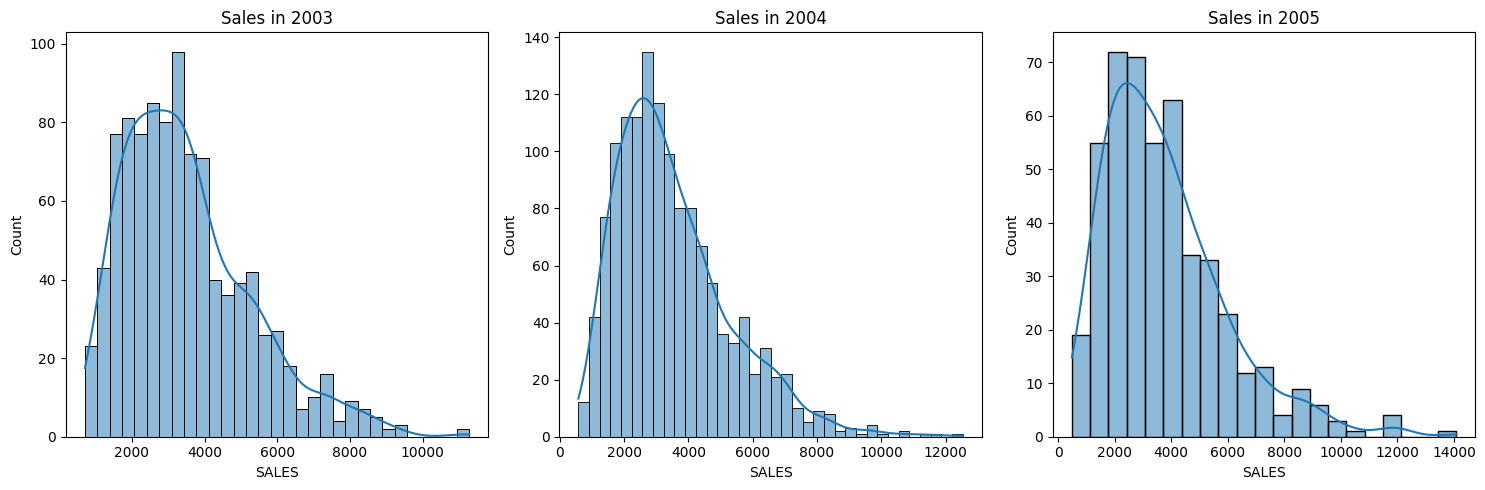

In [173]:
#calculating the optimal number of bins.
data_points_2003_Sales = len(df_2003['SALES'])
bins_2003_Sales = int(np.sqrt(data_points_2003_Sales))

data_points_2004_Sales = len(df_2004['SALES'])
bins_2004_Sales = int(np.sqrt(data_points_2004_Sales))

data_points_2005_Sales = len(df_2005['SALES'])
bins_2005_Sales = int(np.sqrt(data_points_2005_Sales))

#Generating the Tables
fig, axs = plt.subplots(1,3,figsize=(15, 5))

sns.histplot(df_2003['SALES'],kde=True,bins=bins_2003_Sales,ax=axs[0])
sns.histplot(df_2004['SALES'],kde=True,bins=bins_2004_Sales,ax=axs[1])
sns.histplot(df_2005['SALES'],kde=True,bins=bins_2005_Sales,ax=axs[2])

#Titles
axs[0].set_title('Sales in 2003')
axs[1].set_title('Sales in 2004')
axs[2].set_title('Sales in 2005')

plt.tight_layout()

plt.savefig("Sales_Corrolation.png")
plt.show()

# Products' Sales Distribution

In [174]:
pivot_Table_2003_Sales=pd.pivot_table(
    data=df_2003,
    values='SALES',
    index='PRODUCTLINE',
    aggfunc='sum'
)
pivot_Table_2003_Sales.rename(columns={'SALES': 'Sales 2003'}, inplace=True)

pivot_Table_2004_Sales=pd.pivot_table(
    data=df_2004,
    values='SALES',
    index='PRODUCTLINE',
    aggfunc='sum'
)
pivot_Table_2004_Sales.rename(columns={'SALES': 'Sales 2004'}, inplace=True)

pivot_Table_2005_Sales=pd.pivot_table(
    data=df_2005,
    values='SALES',
    index='PRODUCTLINE',
    aggfunc='sum'
)
pivot_Table_2005_Sales.rename(columns={'SALES': 'Sales 2005'}, inplace=True)

df_SalesPerYear = pd.merge(pivot_Table_2003_Sales, pivot_Table_2004_Sales, on="PRODUCTLINE") 
df_SalesPerYear = pd.merge(df_SalesPerYear, pivot_Table_2005_Sales, on="PRODUCTLINE") 
df_SalesPerYear.reset_index()

,PRODUCTLINE,Sales 2003,Sales 2004,Sales 2005
0,Classic Cars,1484785.29,1762257.09,672573.28
1,Motorcycles,370895.58,560545.23,234947.53
2,Planes,272257.60,502671.80,200074.17
3,Ships,244821.09,341437.97,128178.07
4,Trains,72802.29,116523.85,36917.33
5,Trucks and Buses,420429.93,529302.89,178057.02
6,Vintage Cars,650987.76,911423.77,340739.31


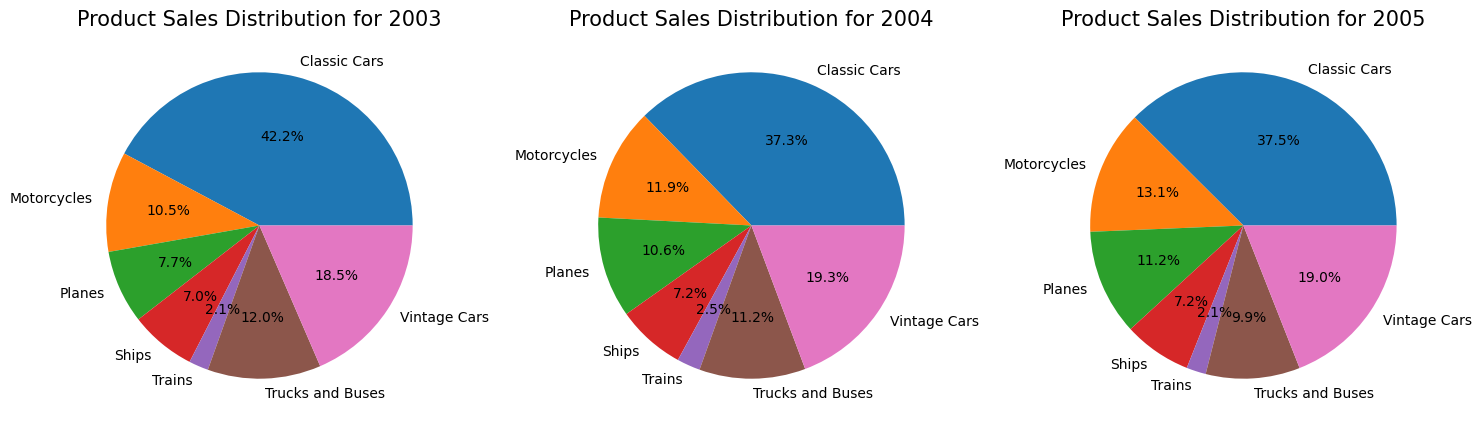

In [175]:
fig, axs = plt.subplots(1,3,figsize=(15, 5))

axs[0].pie(pivot_Table_2003_Sales['Sales 2003'], labels=pivot_Table_2003_Sales.index, autopct='%1.1f%%')
axs[0].set_title('Product Sales Distribution for 2003',fontsize=15)

axs[1].pie(pivot_Table_2004_Sales['Sales 2004'], labels=pivot_Table_2004_Sales.index, autopct='%1.1f%%')
axs[1].set_title('Product Sales Distribution for 2004',fontsize=15)

axs[2].pie(pivot_Table_2005_Sales['Sales 2005'], labels=pivot_Table_2005_Sales.index, autopct='%1.1f%%')
axs[2].set_title('Product Sales Distribution for 2005',fontsize=15)


plt.tight_layout()

plt.show()

# Products' Orders Distribution

In [176]:
pivot_Table_2003_Orders=pd.pivot_table(
    data=df_2003,
    values='QUANTITYORDERED',
    index='PRODUCTLINE',
    aggfunc='sum'
)
pivot_Table_2003_Orders.rename(columns={'QUANTITYORDERED': 'Orders 2003'}, inplace=True)

pivot_Table_2004_Orders=pd.pivot_table(
    data=df_2004,
    values='QUANTITYORDERED',
    index='PRODUCTLINE',
    aggfunc='sum'
)
pivot_Table_2004_Orders.rename(columns={'QUANTITYORDERED': 'Orders 2004'}, inplace=True)

pivot_Table_2005_Orders=pd.pivot_table(
    data=df_2005,
    values='QUANTITYORDERED',
    index='PRODUCTLINE',
    aggfunc='sum'
)
pivot_Table_2005_Orders.rename(columns={'QUANTITYORDERED': 'Orders 2005'}, inplace=True)

df_OrdersPerYear = pd.merge(pivot_Table_2003_Orders, pivot_Table_2004_Orders, on="PRODUCTLINE") 
df_OrdersPerYear = pd.merge(df_OrdersPerYear, pivot_Table_2005_Orders, on="PRODUCTLINE") 
df_OrdersPerYear.reset_index()

,PRODUCTLINE,Orders 2003,Orders 2004,Orders 2005
0,Classic Cars,12473,15418,6101
1,Motorcycles,3739,5690,2234
2,Planes,2996,5524,2207
3,Ships,2844,3937,1346
4,Trains,1000,1303,409
5,Trucks and Buses,4056,5002,1719
6,Vintage Cars,7504,9950,3615


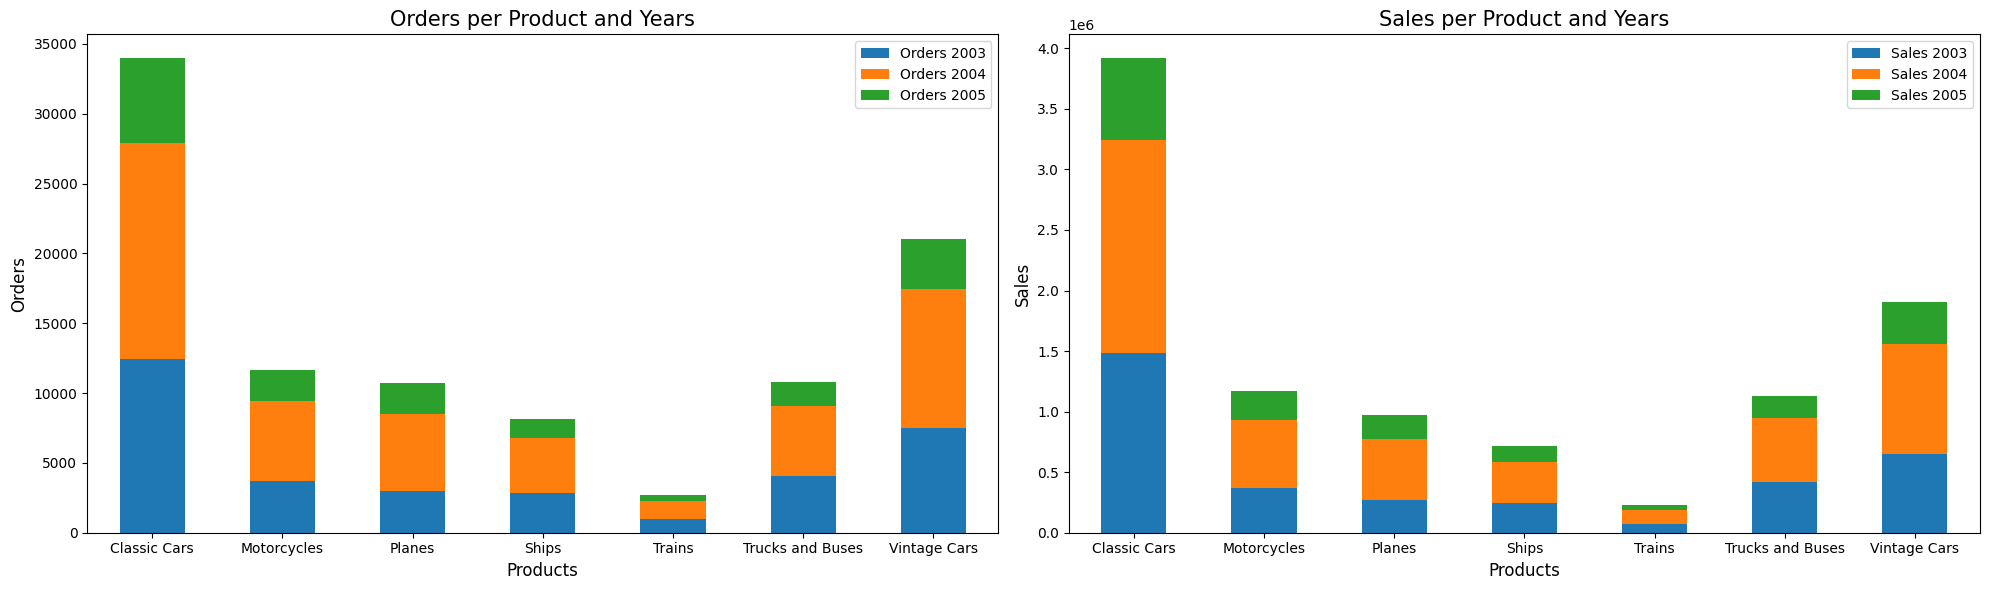

In [177]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df_OrdersPerYear.plot(kind='bar',stacked=True, ax=axs[0])
axs[0].set_xlabel('Products', fontsize=12)
axs[0].set_ylabel('Orders', fontsize=12)
axs[0].set_title("Orders per Product and Years", fontsize=15)
axs[0].tick_params(axis='x', rotation=0)


df_SalesPerYear .plot(kind='bar',stacked=True, ax=axs[1])
axs[1].set_xlabel('Products', fontsize=12)
axs[1].set_ylabel('Sales', fontsize=12)
axs[1].set_title("Sales per Product and Years", fontsize=15)
axs[1].tick_params(axis='x', rotation=0)


plt.tight_layout()

plt.savefig("ProductOrdersSalesPerYear.png")
plt.show()

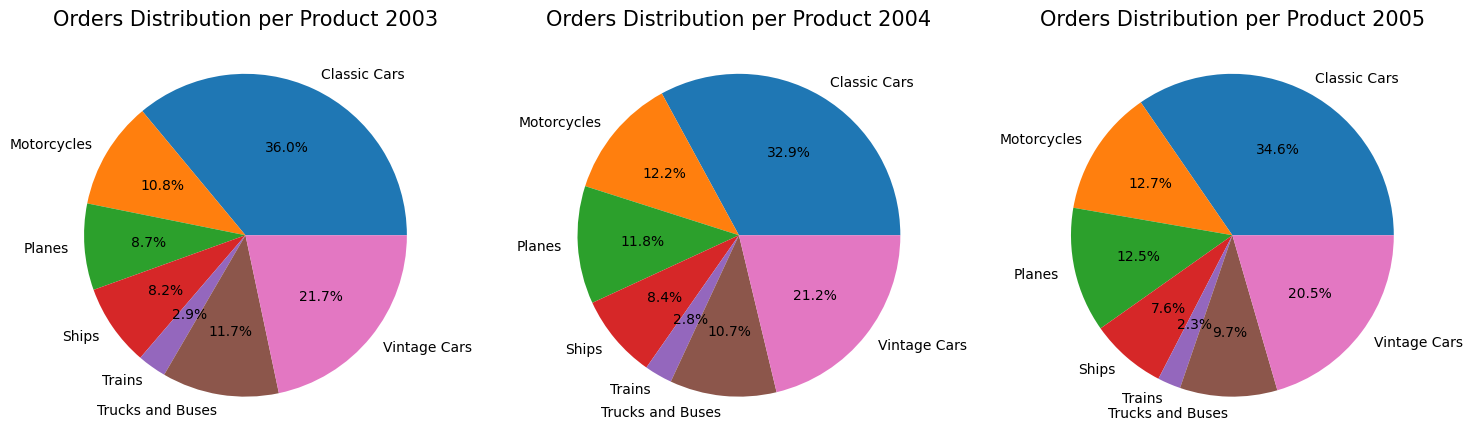

In [178]:
fig, axs = plt.subplots(1,3,figsize=(15, 5))

axs[0].pie(pivot_Table_2003_Orders['Orders 2003'], labels=pivot_Table_2003_Orders.index, autopct='%1.1f%%')
axs[0].set_title('Orders Distribution per Product 2003',fontsize=15)

axs[1].pie(pivot_Table_2004_Orders['Orders 2004'], labels=pivot_Table_2004_Orders.index, autopct='%1.1f%%')
axs[1].set_title('Orders Distribution per Product 2004',fontsize=15)

axs[2].pie(pivot_Table_2005_Orders['Orders 2005'], labels=pivot_Table_2005_Orders.index, autopct='%1.1f%%')
axs[2].set_title('Orders Distribution per Product 2005',fontsize=15)


plt.tight_layout()

plt.show()

# Product Sales and Orders per Regions

In [179]:
df_ProductPerRegion_Orders = pd.pivot_table(
    data=df,
    values='QUANTITYORDERED',
    index='PRODUCTLINE',
    columns=['TERRITORY'],
    aggfunc='sum'
)
df_ProductPerRegion_Sales = pd.pivot_table(
    data=df,
    values='SALES',
    index='PRODUCTLINE',
    columns=['TERRITORY'],
    aggfunc='sum'
)

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_ProductPerRegion_Orders,df_ProductPerRegion_Sales)

TERRITORY,AMER,APAC,EMEA
PRODUCTLINE,,,
Classic Cars,12081,3653,18258
Motorcycles,5121,1470,5072
Planes,3793,1575,5359
Ships,2881,438,4808
Trains,912,256,1544
Trucks and Buses,4449,1695,4633
Vintage Cars,8715,2722,9632
TERRITORY,AMER,APAC,EMEA
PRODUCTLINE,,,


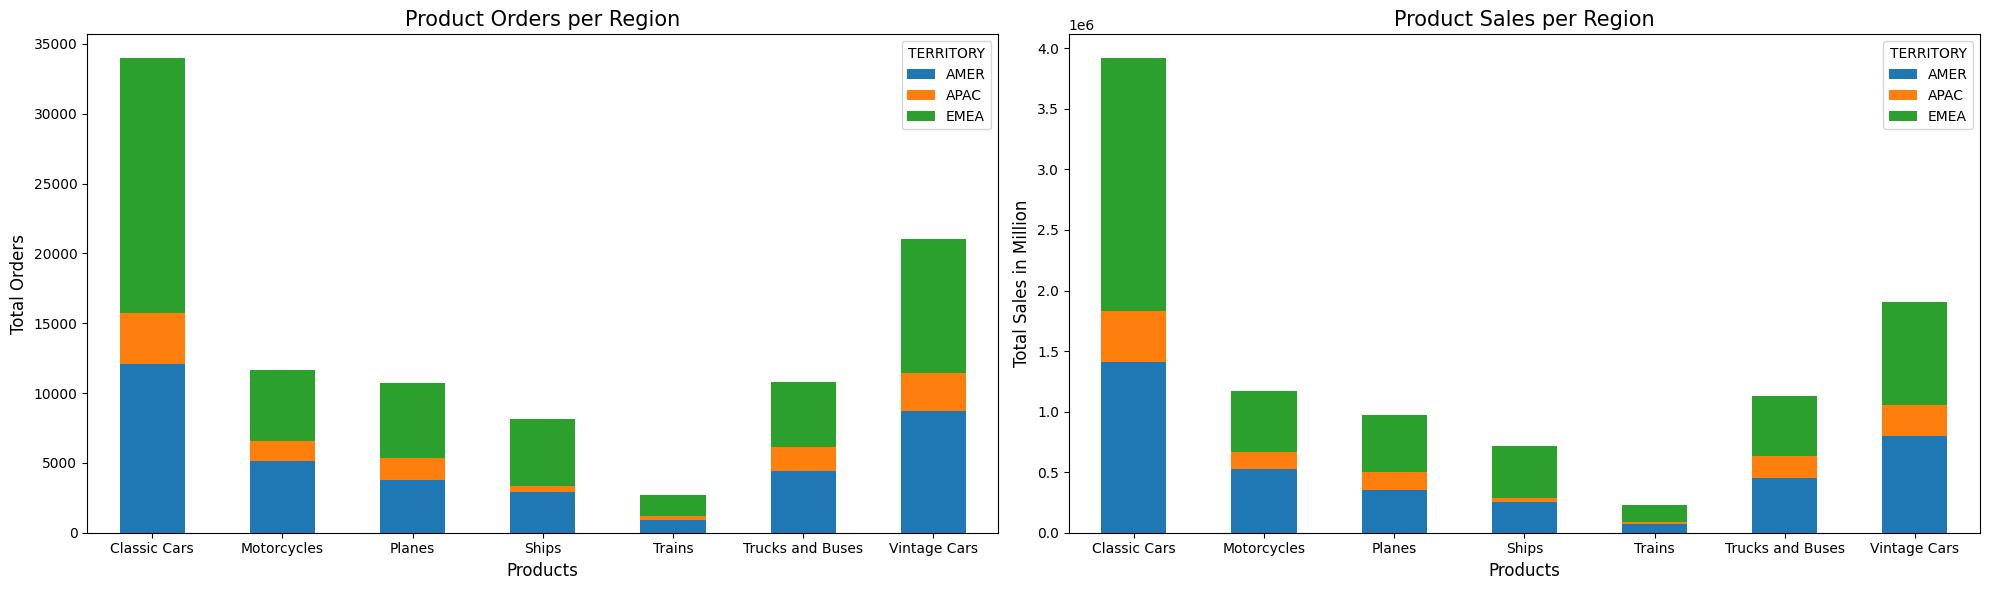

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df_ProductPerRegion_Orders.plot(kind='bar',stacked=True,ax=axs[0])
axs[0].set_xlabel('Products', fontsize=12)
axs[0].set_ylabel('Total Orders', fontsize=12)
axs[0].set_title("Product Orders per Region", fontsize=15)
axs[0].tick_params(axis='x', rotation=0)

df_ProductPerRegion_Sales.plot(kind='bar',stacked=True,ax=axs[1])
axs[1].set_xlabel('Products', fontsize=12)
axs[1].set_ylabel('Total Sales in Million', fontsize=12)
axs[1].set_title("Product Sales per Region", fontsize=15)
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()

plt.savefig("ProductOrdersSalesPerRegion.png")
plt.show()

# Total Sales and Orders per Region

In [181]:
#Sales
pivot_SalesTer= df.pivot_table(
    index='TERRITORY',
    values='SALES',
    aggfunc='sum'
)
pivot_SalesTer = pivot_SalesTer.reset_index()
#Orders
pivot_OrdersTer= df.pivot_table(
    index='TERRITORY',
    values='QUANTITYORDERED',
    aggfunc='sum'
)
pivot_OrdersTer = pivot_OrdersTer.reset_index()
#Merged
pivot_MergedTer= pd.merge(pivot_SalesTer,pivot_OrdersTer, on="TERRITORY")
pivot_MergedTer

,TERRITORY,SALES,QUANTITYORDERED
0,AMER,3852061.39,37952
1,APAC,1201295.05,11809
2,EMEA,4979272.41,49306


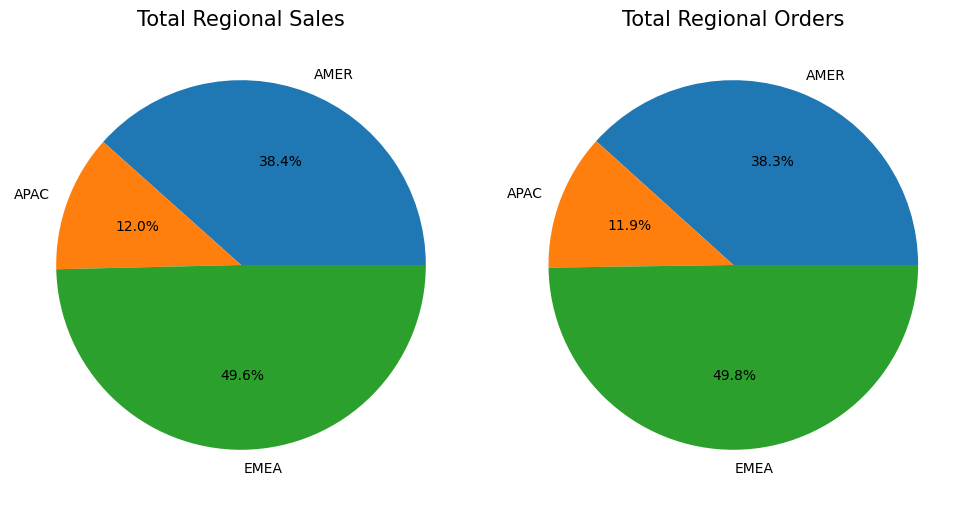

In [182]:
pivot_SalesTer.set_index('TERRITORY', inplace=True)
pivot_OrdersTer.set_index('TERRITORY', inplace=True)

fig, axs = plt.subplots(1,2,figsize=(10, 5))

axs[0].pie(pivot_SalesTer['SALES'], labels=pivot_SalesTer.index, autopct='%1.1f%%')
axs[0].set_title('Total Regional Sales',fontsize=15)

axs[1].pie(pivot_OrdersTer['QUANTITYORDERED'], labels=pivot_OrdersTer.index, autopct='%1.1f%%')
axs[1].set_title('Total Regional Orders',fontsize=15)

plt.tight_layout()

plt.savefig("RegionalSalesOrders.png")
plt.show()

# Annual Sales and Orders per Region

# Sales

In [183]:
#Sales
pivot_Table_2003_SalesTer=pd.pivot_table(
    data=df_2003,
    values='SALES',
    index='TERRITORY',
    aggfunc='sum'
)
pivot_Table_2003_SalesTer.rename(columns={'SALES': 'Sales 2003'}, inplace=True)

pivot_Table_2004_SalesTer=pd.pivot_table(
    data=df_2004,
    values='SALES',
    index='TERRITORY',
    aggfunc='sum'
)
pivot_Table_2004_SalesTer.rename(columns={'SALES': 'Sales 2004'}, inplace=True)

pivot_Table_2005_SalesTer=pd.pivot_table(
    data=df_2005,
    values='SALES',
    index='TERRITORY',
    aggfunc='sum'
)
pivot_Table_2005_SalesTer.rename(columns={'SALES': 'Sales 2005'}, inplace=True)

df_SalesTerPerYear = pd.merge(pivot_Table_2003_SalesTer, pivot_Table_2004_SalesTer, on="TERRITORY") 
df_SalesTerPerYear = pd.merge(df_SalesTerPerYear, pivot_Table_2005_SalesTer, on="TERRITORY")
df_SalesTerPerYear = df_SalesTerPerYear.reset_index()

#Orders
pivot_Table_2003_OrdersTer=pd.pivot_table(
    data=df_2003,
    values='QUANTITYORDERED',
    index='TERRITORY',
    aggfunc='sum'
)
pivot_Table_2003_OrdersTer.rename(columns={'QUANTITYORDERED': 'Orders 2003'}, inplace=True)

pivot_Table_2004_OrdersTer=pd.pivot_table(
    data=df_2004,
    values='QUANTITYORDERED',
    index='TERRITORY',
    aggfunc='sum'
)
pivot_Table_2004_OrdersTer.rename(columns={'QUANTITYORDERED': 'Orders 2004'}, inplace=True)

pivot_Table_2005_OrdersTer=pd.pivot_table(
    data=df_2005,
    values='QUANTITYORDERED',
    index='TERRITORY',
    aggfunc='sum'
)
pivot_Table_2005_OrdersTer.rename(columns={'QUANTITYORDERED': 'Orders 2005'}, inplace=True)

df_OrdersTerPerYear = pd.merge(pivot_Table_2003_OrdersTer, pivot_Table_2004_OrdersTer, on="TERRITORY") 
df_OrdersTerPerYear = pd.merge(df_OrdersTerPerYear, pivot_Table_2005_OrdersTer, on="TERRITORY")

df_TerPerYear = pd.merge(df_SalesTerPerYear, df_OrdersTerPerYear, on="TERRITORY")

df_TerPerYear=df_TerPerYear.reset_index()
df_TerPerYear

,index,TERRITORY,Sales 2003,Sales 2004,Sales 2005,Orders 2003,Orders 2004,Orders 2005
0,0,AMER,1359757.38,1821246.78,671057.23,13348,18157,6447
1,1,APAC,496907.63,513786.93,190600.49,4769,5093,1947
2,2,EMEA,1660314.53,2389128.89,929828.99,16495,23574,9237


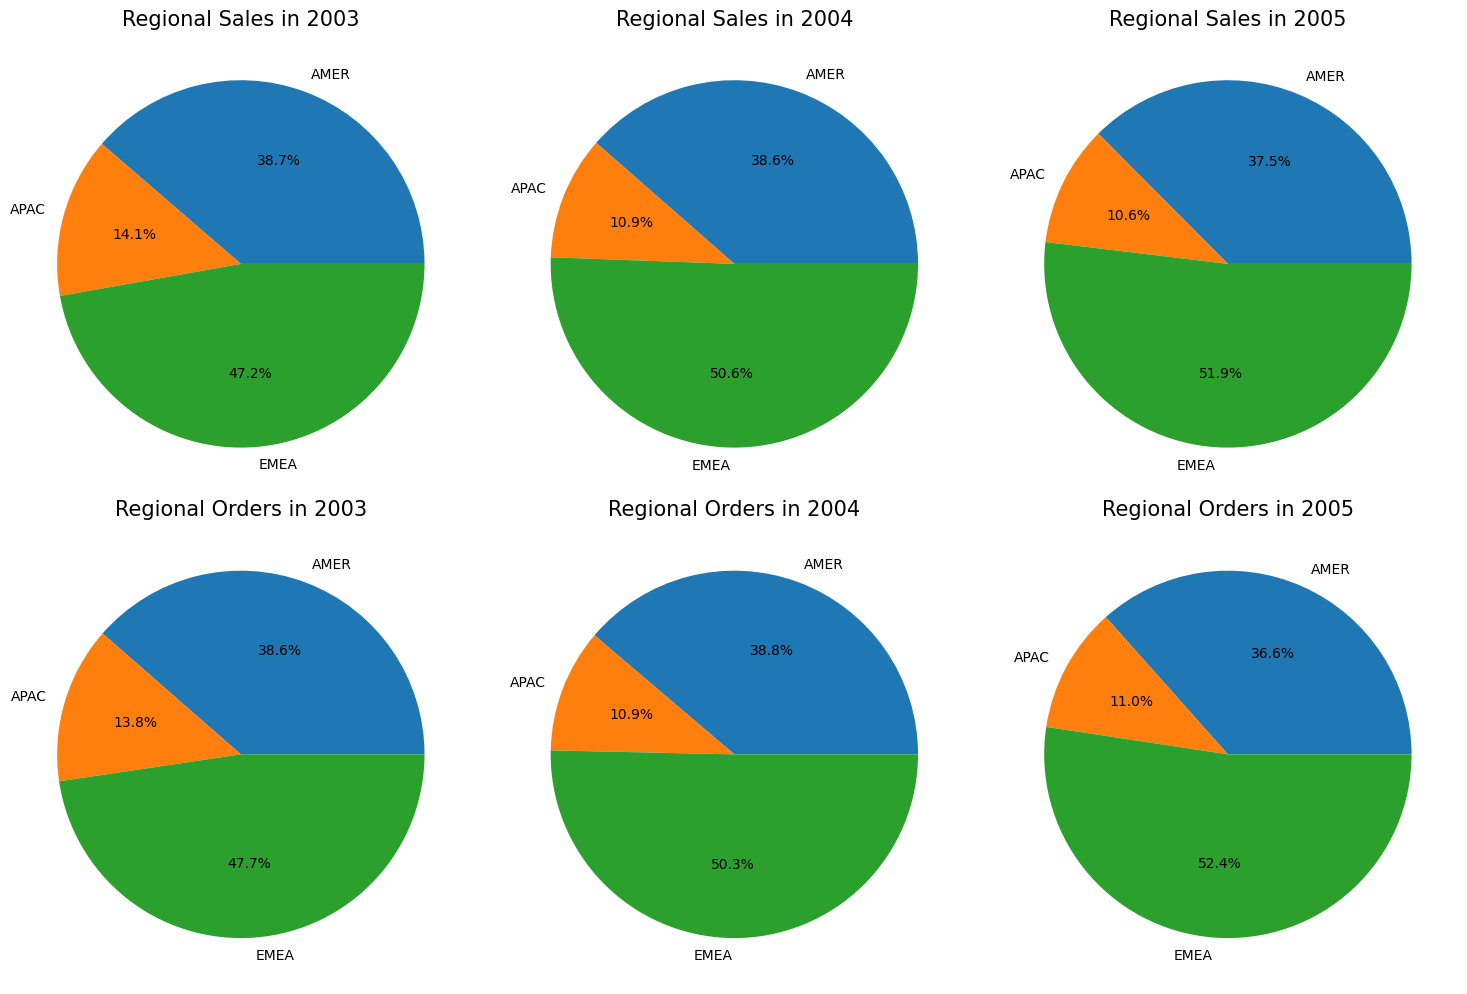

In [184]:
fig, axs = plt.subplots(2,3,figsize=(15, 10))

axs[0,0].pie(pivot_Table_2003_SalesTer['Sales 2003'], labels=pivot_Table_2003_SalesTer.index, autopct='%1.1f%%')
axs[0,0].set_title('Regional Sales in 2003',fontsize=15)

axs[0,1].pie(pivot_Table_2004_SalesTer['Sales 2004'], labels=pivot_Table_2004_SalesTer.index, autopct='%1.1f%%')
axs[0,1].set_title('Regional Sales in 2004',fontsize=15)

axs[0,2].pie(pivot_Table_2005_SalesTer['Sales 2005'], labels=pivot_Table_2005_SalesTer.index, autopct='%1.1f%%')
axs[0,2].set_title('Regional Sales in 2005',fontsize=15)

axs[1,0].pie(pivot_Table_2003_OrdersTer['Orders 2003'], labels=pivot_Table_2003_OrdersTer.index, autopct='%1.1f%%')
axs[1,0].set_title('Regional Orders in 2003',fontsize=15)

axs[1,1].pie(pivot_Table_2004_OrdersTer['Orders 2004'], labels=pivot_Table_2004_OrdersTer.index, autopct='%1.1f%%')
axs[1,1].set_title('Regional Orders in 2004',fontsize=15)

axs[1,2].pie(pivot_Table_2005_OrdersTer['Orders 2005'], labels=pivot_Table_2005_OrdersTer.index, autopct='%1.1f%%')
axs[1,2].set_title('Regional Orders in 2005',fontsize=15)

plt.tight_layout()

plt.show()

# DEALSIZE
# How Sales and Orders are related to Dealsize.

In [185]:
df_Dealsize= df[["DEALSIZE",'QUANTITYORDERED','SALES']]

small_deals = df_Dealsize[df_Dealsize['DEALSIZE'] == 'Small']

small_Orders_summary = pd.concat([
    small_deals.sort_values(by='QUANTITYORDERED').head(5),
    small_deals.sort_values(by='QUANTITYORDERED').tail(5)
], keys=['Small_Orders_Min', 'Small_Orders_Max'])

small_Sales_summary = pd.concat([
    small_deals.sort_values(by='SALES').head(5),
    small_deals.sort_values(by='SALES').tail(5)
], keys=['Small_Sales_Min', 'Small_Sales_Max'])

medium_deals = df_Dealsize[df_Dealsize['DEALSIZE'] == 'Medium']

medium_Orders_summary = pd.concat([
    medium_deals.sort_values(by='QUANTITYORDERED').head(5),
    medium_deals.sort_values(by='QUANTITYORDERED').tail(5)
], keys=['Medium_Orders_Min', 'Medium_Orders_Max'])

medium_Sales_summary = pd.concat([
    medium_deals.sort_values(by='SALES').head(5),
    medium_deals.sort_values(by='SALES').tail(5)
], keys=['Medium_Sales_Min', 'Medium_Sales_Max'])

large_deals = df_Dealsize[df_Dealsize['DEALSIZE'] == 'Large']

large_Orders_summary = pd.concat([
    large_deals.sort_values(by='QUANTITYORDERED').head(5),
    large_deals.sort_values(by='QUANTITYORDERED').tail(5)
], keys=['Large_Orders_Min', 'Large_Orders_Max'])

large_Sales_summary = pd.concat([
    large_deals.sort_values(by='SALES').head(5),
    large_deals.sort_values(by='SALES').tail(5)
], keys=['Large_Sales_Min', 'Large_Sales_Max'])

all_deals_Orders_summary = pd.concat([small_Orders_summary, medium_Orders_summary, large_Orders_summary])
all_deals_Sales_summary = pd.concat([small_Sales_summary, medium_Sales_summary, large_Sales_summary])

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(all_deals_Orders_summary,all_deals_Sales_summary)

DEALSIZE 
 QUANTITYORDERED 
 SALES 
 
 
 
 
 Small_Orders_Min 
 751 
 Small 
 6 
 785.64 
 
 
 1287 
 Small 
 6 
 541.14 
 
 
 315 
 Small 
 10 
 1092.20 
 
 
 907 
 Small 
 10 
 881.40 
 
 
 2507 
 Small 
 11 
 1135.31 
 
 
 Small_Orders_Max 
 1893 
 Small 
 55 
 2896.30 
 
 
 1465 
 Small 
 55 
 2575.10 
 
 
 2376 
 Small 
 56 
 1979.60 
 
 
 1562 
 Small 
 61 
 1801.94 
 
 
 1514 
 Small 
 64 
 2576.00 
 
 
 Medium_Orders_Min 
 169 
 Medium 
 20 
 3930.40 
 
 
 2450 
 Medium 
 20 
 3657.80 
 
 
 73 
 Medium 
 20 
 3176.00 
 
 
 332 
 Medium 
 20 
 3633.40 
 
 
 85 
 Medium 
 20 
 4183.00 
 
 
 Medium_Orders_Max 
 624 
 Medium 
 61 
 4509.12 
 
 
 2325 
 Medium 
 62 
 4819.26 
 
 
 2022 
 Medium 
 64 
 3843.20 
 
 
 1288 
 Medium 
 66 
 6134.70 
 
 
 1413 
 Medium 
 66 
 4421.34 
 
 
 Large_Orders_Min 
 27 
 Large 
 29 
 7209.11 
 
 
 1363 
 Large 
 29 
 7110.80 
 
 
 82 
 Large 
 31 
 7023.98 
 
 
 39 
 Large 
 32 
 7680.64 
 
 
 196 
 Large 
 32 
 7181.44 
 
 
 Large_Orders_Max 
 1995 
 Large 
 76 
 11739.70 
 
 
 1714 
 Large 
 76 
 7182.00 
 
 
 2689 
 Large 
 77 
 7084.00 
 
 
 2586 
 Large 
 85 
 7543.75 
 
 
 418 
 Large 
 97 
 9048.16 
 
 
 
 
 
 
 
 DEALSIZE 
 QUANTITYORDERED 
 SALES 
 
 
 
 
 Small_Sales_Min 
 2249 
 Small 
 11 
 482.13 
 
 
 1287 
 Small 
 6 
 541.14 
 
 
 2044 
 Small 
 15 
 553.95 
 
 
 1551 
 Small 
 20 
 577.60 
 
 
 1818 
 Small 
 15 
 640.05 
 
 
 Small_Sales_Max 
 120 
 Small 
 25 
 2992.00 
 
 
 1493 
 Small 
 50 
 2993.50 
 
 
 2573 
 Small 
 33 
 2994.75 
 
 
 1888 
 Small 
 48 
 2997.60 
 
 
 1101 
 Small 
 41 
 2999.97 
 
 
 Medium_Sales_Min 
 2008 
 Medium 
 40 
 3002.40 
 
 
 46 
 Medium 
 26 
 3003.00 
 
 
 2801 
 Medium 
 50 
 3003.00 
 
 
 2722 
 Medium 
 28 
 3003.00 
 
 
 2020 
 Medium 
 41 
 3006.12 
 
 
 Medium_Sales_Max 
 327 
 Medium 
 49 
 6952.12 
 
 
 562 
 Medium 
 49 
 6954.08 
 
 
 1602 
 Medium 
 48 
 6960.48 
 
 
 827 
 Medium 
 39 
 6981.00 
 
 
 1978 
 Medium 
 47 
 6996.42 
 
 
 Large_Sales_Min 
 277 
 Large 
 43 
 7016.31 
 
 
 738 
 Large 
 46 
 7017.76 
 
 
 143 
 Large 
 48 
 7020.48 
 
 
 148 
 Large 
 44 
 7020.64 
 
 
 91 
 Large 
 39 
 7023.90 
 
 
 Large_Sales_Max 
 104 
 Large 
 66 
 11886.60 
 
 
 1062 
 Large 
 60 
 11887.80 
 
 
 53 
 Large 
 50 
 12001.00 
 
 
 744 
 Large 
 50 
 12536.50 
 
 
 598 
 Large 
 76 
 14082.80

From the Below Table we under stand that the Dealsize is not related to the orders but only to Sales.
* Small Size < 3000
* 3000 < Medium Size < 7000
* 7000 < LargeSize

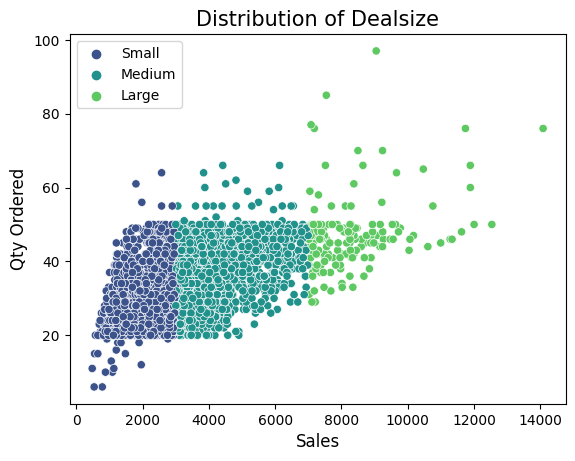

In [186]:
sns.scatterplot(x='SALES',y='QUANTITYORDERED',hue='DEALSIZE',data=df,palette='viridis')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Qty Ordered', fontsize=12)
plt.title("Distribution of Dealsize", fontsize=15)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')
plt.xticks(rotation=0)

plt.savefig("DealSizeDistribution.png")
plt.show()

# Dealsize per Region

In [187]:
pivot_Dealsize_Region_2003 = df_2003.pivot_table(
    index='TERRITORY',
    columns= ['YEAR_ID','DEALSIZE'],
    values='SALES',
    aggfunc='sum'
)

pivot_Dealsize_Region_2004 = df_2004.pivot_table(
    index='TERRITORY',
    columns= ['YEAR_ID','DEALSIZE'],
    values='SALES',
    aggfunc='sum'
)

pivot_Dealsize_Region_2005 = df_2005.pivot_table(
    index='TERRITORY',
    columns= ['YEAR_ID','DEALSIZE'],
    values='SALES',
    aggfunc='sum'
)
pivot_Dealsize_RegionMerged= pd.merge(pivot_Dealsize_Region_2003, pivot_Dealsize_Region_2004, on="TERRITORY") 
pivot_Dealsize_RegionMerged = pd.merge(pivot_Dealsize_RegionMerged, pivot_Dealsize_Region_2005, on="TERRITORY")
pivot_Dealsize_RegionMerged

YEAR_ID         2003                              2004                         \
DEALSIZE       Large      Medium      Small      Large      Medium      Small   
TERRITORY                                                                       
AMER       186331.06   842695.70  330730.62  205851.17  1105540.46  509855.15   
APAC        61062.83   291162.09  144682.71   43660.17   314917.82  155208.94   
EMEA       185426.05  1044853.95  430034.53  268242.37  1448899.60  671986.92   

YEAR_ID         2005                        
DEALSIZE       Large     Medium      Small  
TERRITORY                                   
AMER       144585.04  397556.48  128915.71  
APAC        23846.37  117241.09   49513.03  
EMEA       183114.20  524565.05  222149.74

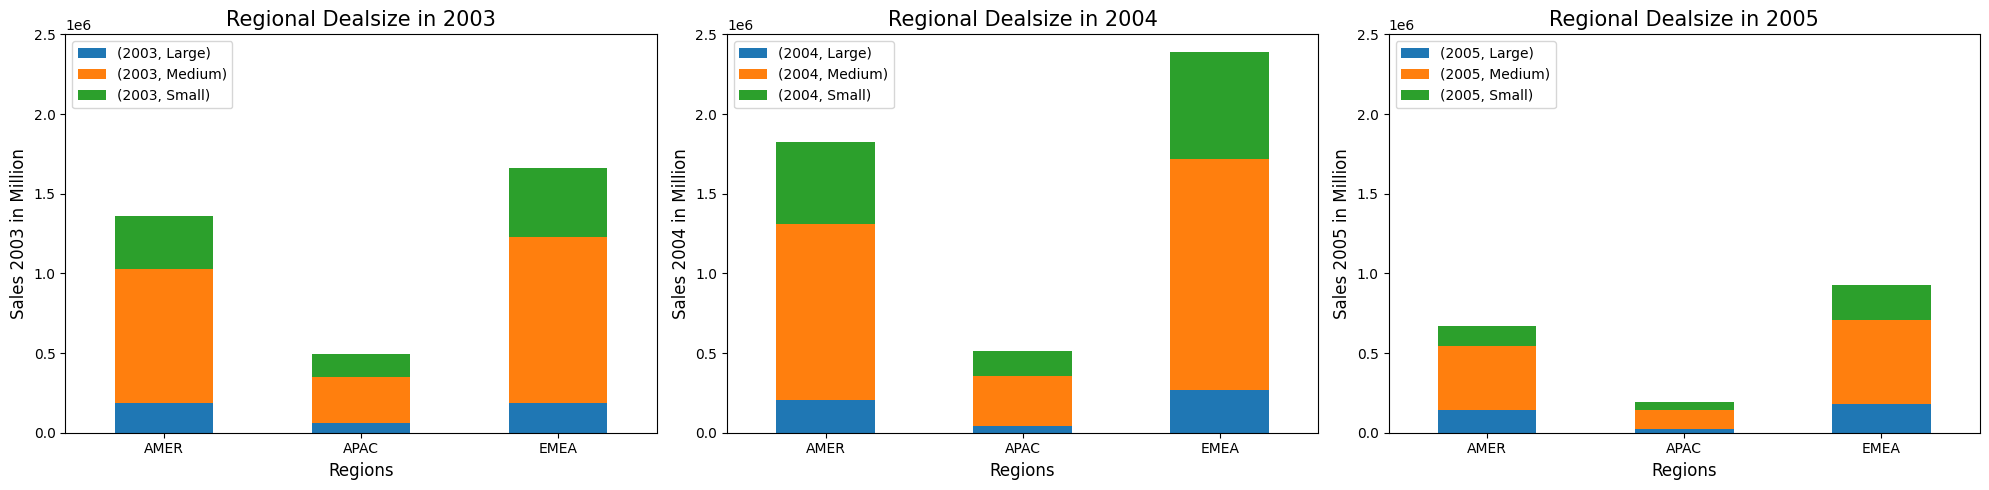

In [188]:
fig, axs = plt.subplots(1,3,figsize=(20, 5))

pivot_Dealsize_Region_2003.plot(kind='bar',stacked=True,ax=axs[0])
axs[0].set_ylim(bottom=0, top=2500000)
axs[0].set_xlabel('Regions', fontsize=12)
axs[0].set_ylabel('Sales 2003 in Million', fontsize=12)
axs[0].set_title("Regional Dealsize in 2003", fontsize=15)
axs[0].tick_params(axis='x', rotation=0)

pivot_Dealsize_Region_2004.plot(kind='bar',stacked=True,ax=axs[1])
axs[1].set_ylim(bottom=0, top=2500000)
axs[1].set_xlabel('Regions', fontsize=12)
axs[1].set_ylabel('Sales 2004 in Million', fontsize=12)
axs[1].set_title("Regional Dealsize in 2004", fontsize=15)
axs[1].tick_params(axis='x', rotation=0)

pivot_Dealsize_Region_2005.plot(kind='bar',stacked=True,ax=axs[2])
axs[2].set_ylim(bottom=0, top=2500000)
axs[2].set_xlabel('Regions', fontsize=12)
axs[2].set_ylabel('Sales 2005 in Million', fontsize=12)
axs[2].set_title("Regional Dealsize in 2005", fontsize=15)
axs[2].tick_params(axis='x', rotation=0)

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

plt.tight_layout()
plt.show()

# The Top 10 Countries with the Highest Sales.

In [189]:
Top10Countries_Sales = pd.pivot_table(
    data=df,
    values='SALES',
    index='COUNTRY',
    aggfunc='sum',
    columns = 'DEALSIZE',
)

Top10Countries_Sales_sorted = Top10Countries_Sales.sum(axis=1).sort_values(ascending=False)

Top10Countries_Sales = Top10Countries_Sales.reindex(Top10Countries_Sales_sorted.index)
Top10Countries_Sales = Top10Countries_Sales.head(10)
Top10Countries_Sales

DEALSIZE,Large,Medium,Small
COUNTRY,,,
USA,527702.38,2208362.16,891918.29
Spain,141042.51,757927.09,316717.32
France,179004.87,643606.22,288305.43
Australia,60252.04,381245.00,189126.06
UK,35155.24,301233.02,142492.20
Italy,57565.43,184133.88,132975.00
Finland,40012.32,201741.96,87827.63
Norway,41042.70,190502.23,75918.77
Singapore,35363.19,178562.94,74562.28


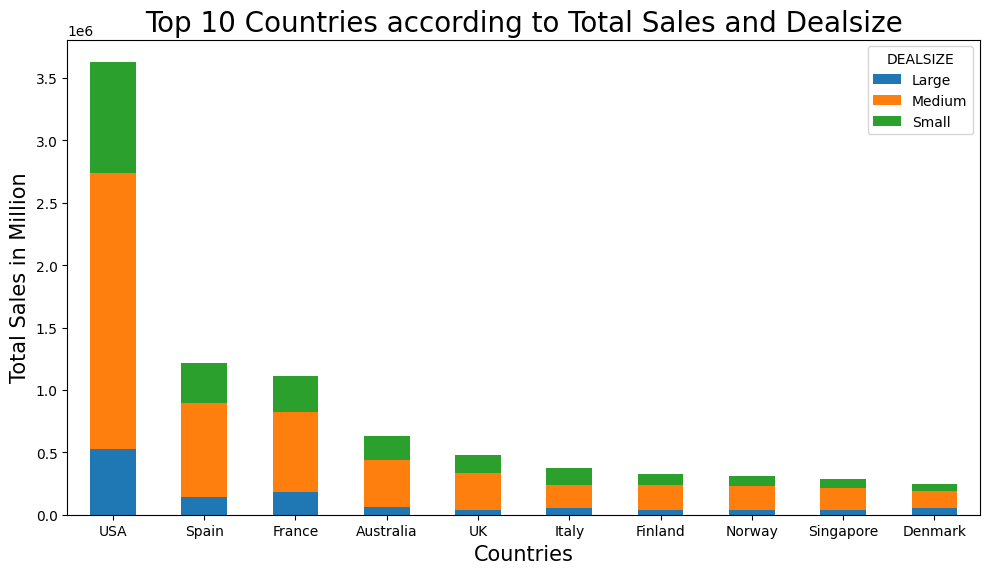

In [190]:
Top10Countries_Sales.plot(kind='bar', stacked=True,figsize=(10,6) )
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Total Sales in Million', fontsize=15)
plt.title("Top 10 Countries according to Total Sales and Dealsize", fontsize=20)
plt.xticks(rotation=0)

plt.tight_layout()

plt.savefig("Top10Countries.png")
plt.show()

# **Total Regional Sales During the Years**

In [191]:
pivot_Regional_Sales_2003 = pd.pivot_table(
    data=df_2003,
    values='SALES',
    index='MONTH_ID',
    columns=['YEAR_ID','TERRITORY'],
    aggfunc='sum'
)

pivot_Regional_Sales_2004 = pd.pivot_table(
    data=df_2004,
    values='SALES',
    index='MONTH_ID',
    columns=['YEAR_ID','TERRITORY'],
    aggfunc='sum'
)

pivot_Regional_Sales_2005 = pd.pivot_table(
    data=df_2005,
    values='SALES',
    index='MONTH_ID',
    columns=['YEAR_ID','TERRITORY'],
    aggfunc='sum'
)

df_Regional_Sales = pd.merge(pivot_Regional_Sales_2003, pivot_Regional_Sales_2004, on='MONTH_ID',how='outer')
df_Regional_Sales = pd.merge(df_Regional_Sales, pivot_Regional_Sales_2005, on='MONTH_ID',how='outer')
df_Regional_Sales.reset_index().round(2)

YEAR_ID   MONTH_ID       2003                             2004             \
TERRITORY                AMER       APAC       EMEA       AMER       APAC   
0                1   18997.30        NaN  110756.30   61739.40   50490.64   
1                2   25783.76        NaN  115052.43  103607.71   73857.16   
2                3   58492.96   55245.02   60766.92   79427.59        NaN   
3                4   24777.41   94055.13   82777.01   72221.86   17114.43   
4                5   33847.62    9738.18  149087.31  173171.20        NaN   
5                6   96090.45        NaN   71992.11  104371.50   71717.47   
6                7  101312.34   28397.26   58022.28  106633.82   53631.96   
7                8  164602.67        NaN   33206.63  276708.78    3127.88   
8                9   76692.55  102051.41   85229.40   67486.36   42902.84   
9               10  224432.08   77809.37  266049.52  228221.80        NaN   
10              11  334352.72  129611.26  565873.68  422926.25  163039.40   
11              12  200375.52        NaN   61500.94  124730.51   37905.15   

YEAR_ID                    2005                       
TERRITORY       EMEA       AMER      APAC       EMEA  
0          204347.38  152125.37  68043.56  119374.49  
1          133954.66  119030.32  21730.03  217425.83  
2          126306.14  130885.73  39335.85  204041.18  
3          116811.83  141928.93   3141.53  116562.83  
4          100267.19  127086.88  58349.52  272424.66  
5          110585.25        NaN       NaN        NaN  
6          166878.31        NaN       NaN        NaN  
7          181664.61        NaN       NaN        NaN  
8          210361.71        NaN       NaN        NaN  
9          324702.45        NaN       NaN        NaN  
10         503082.36        NaN       NaN        NaN  
11         210167.00        NaN       NaN        NaN

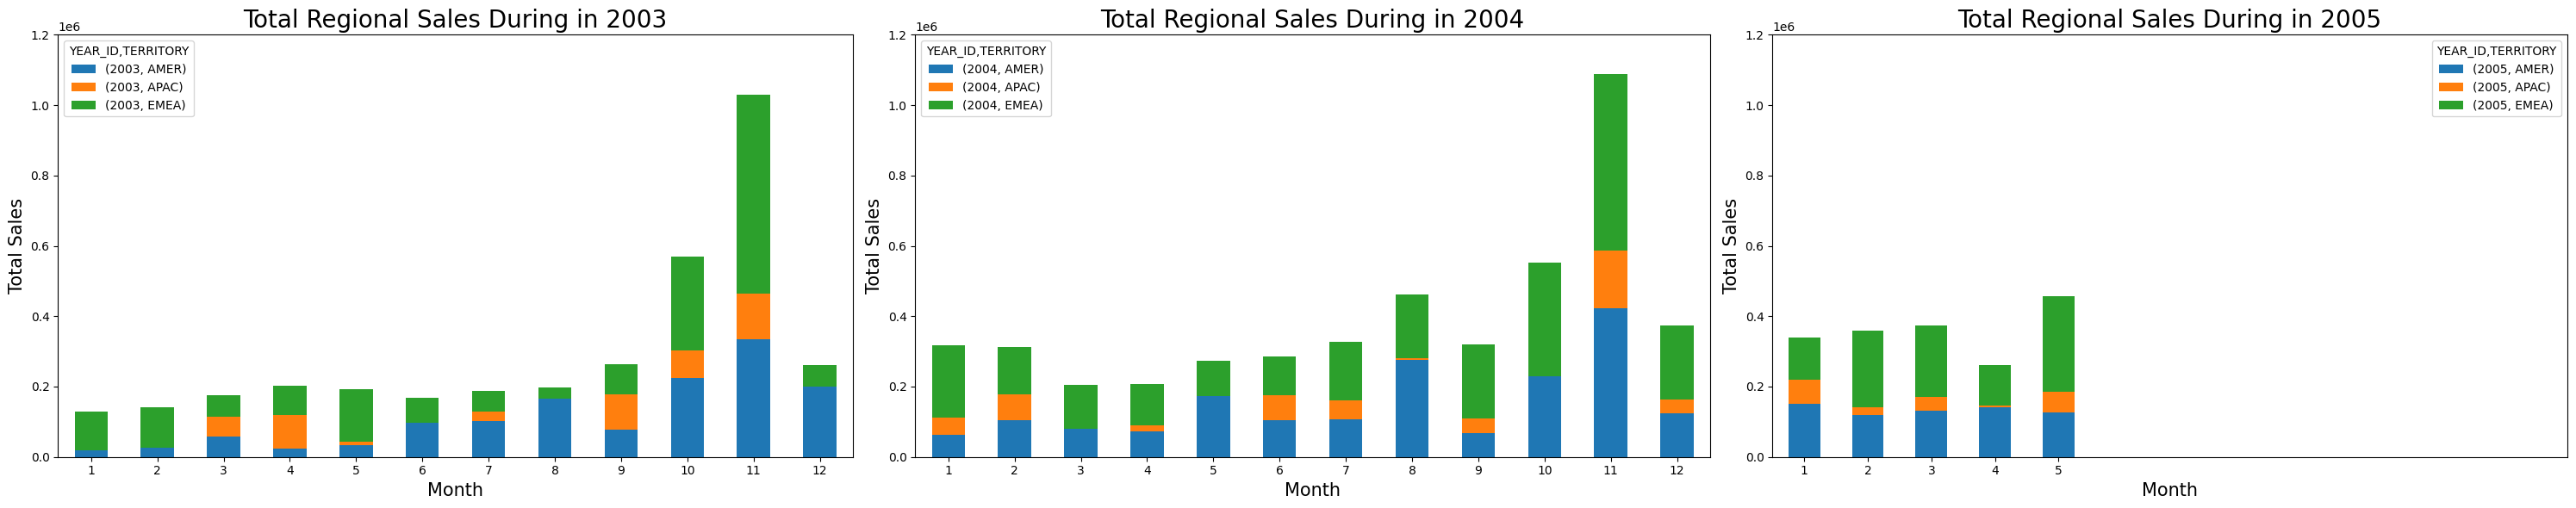

In [192]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
pivot_Regional_Sales_2003.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_ylim(bottom=0, top=1200000)
axes[0].set_xlabel('Month', fontsize=15)
axes[0].set_ylabel('Total Sales', fontsize=15)
axes[0].set_title("Total Regional Sales During in 2003", fontsize=20)
axes[0].tick_params(axis='x', rotation=0)

pivot_Regional_Sales_2004.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_ylim(bottom=0, top=1200000)
axes[1].set_xlabel('Month', fontsize=15)
axes[1].set_ylabel('Total Sales', fontsize=15)
axes[1].set_title("Total Regional Sales During in 2004", fontsize=20)
axes[1].tick_params(axis='x', rotation=0)

pivot_Regional_Sales_2005.plot(kind='bar', stacked=True , ax=axes[2])
axes[2].set_ylim(bottom=0, top=1200000)
axes[2].set_xlim(left=-0.5, right=12)
axes[2].set_xlabel('Month', fontsize=15)
axes[2].set_ylabel('Total Sales', fontsize=15)
axes[2].set_title("Total Regional Sales During in 2005", fontsize=20)
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# **Total Regional Orders During the Years**

In [193]:
pivot_Regional_Orders_2003 = pd.pivot_table(
    data=df_2003,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    columns=['YEAR_ID','TERRITORY'],
    aggfunc='sum'
)

pivot_Regional_Orders_2004 = pd.pivot_table(
    data=df_2004,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    columns=['YEAR_ID','TERRITORY'],
    aggfunc='sum'
)

pivot_Regional_Orders_2005 = pd.pivot_table(
    data=df_2005,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    columns=['YEAR_ID','TERRITORY'],
    aggfunc='sum'
)

df_Regional_Orders = pd.merge(pivot_Regional_Orders_2003, pivot_Regional_Orders_2004, on='MONTH_ID',how='outer')
df_Regional_Orders = pd.merge(df_Regional_Orders, pivot_Regional_Orders_2005, on='MONTH_ID',how='outer')
df_Regional_Orders.reset_index().round(2)

YEAR_ID   MONTH_ID    2003                    2004                    2005  \
TERRITORY             AMER    APAC    EMEA    AMER    APAC    EMEA    AMER   
0                1   231.0     NaN  1126.0   665.0   577.0  2003.0  1540.0   
1                2   229.0     NaN  1220.0  1101.0   737.0  1223.0  1019.0   
2                3   572.0   561.0   622.0   775.0     NaN  1203.0  1205.0   
3                4   210.0   927.0   856.0   836.0   115.0  1126.0  1512.0   
4                5   448.0    66.0  1503.0  1674.0     NaN   944.0  1171.0   
5                6   857.0     NaN   792.0  1159.0   654.0  1158.0     NaN   
6                7   992.0   266.0   467.0  1012.0   468.0  1694.0     NaN   
7                8  1664.0     NaN   310.0  2698.0    28.0  1838.0     NaN   
8                9   784.0   926.0   800.0   706.0   475.0  1990.0     NaN   
9               10  2239.0   670.0  2606.0  2272.0     NaN  3211.0     NaN   
10              11  3204.0  1353.0  5622.0  4007.0  1610.0  5061.0     NaN   
11              12  1918.0     NaN   571.0  1252.0   429.0  2123.0     NaN   

YEAR_ID                   
TERRITORY   APAC    EMEA  
0          577.0  1278.0  
1          209.0  2165.0  
2          383.0  2264.0  
3           82.0  1040.0  
4          696.0  2490.0  
5            NaN     NaN  
6            NaN     NaN  
7            NaN     NaN  
8            NaN     NaN  
9            NaN     NaN  
10           NaN     NaN  
11           NaN     NaN

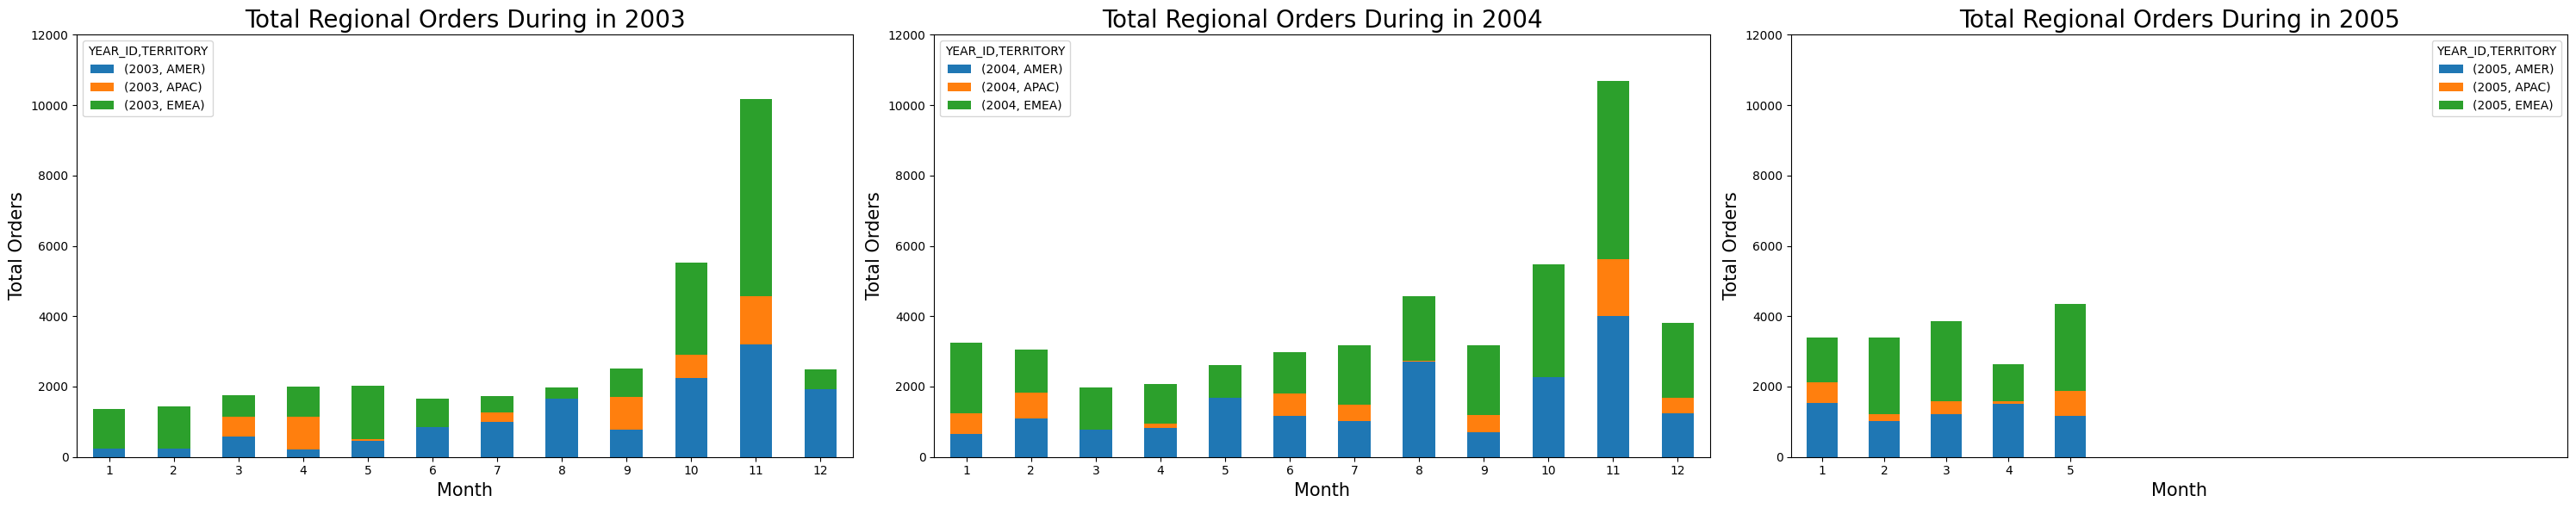

In [194]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
pivot_Regional_Orders_2003.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_ylim(bottom=0, top=12000)
axes[0].set_xlabel('Month', fontsize=15)
axes[0].set_ylabel('Total Orders', fontsize=15)
axes[0].set_title("Total Regional Orders During in 2003", fontsize=20)
axes[0].tick_params(axis='x', rotation=0)

pivot_Regional_Orders_2004.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_ylim(bottom=0, top=12000)
axes[1].set_xlabel('Month', fontsize=15)
axes[1].set_ylabel('Total Orders', fontsize=15)
axes[1].set_title("Total Regional Orders During in 2004", fontsize=20)
axes[1].tick_params(axis='x', rotation=0)

pivot_Regional_Orders_2005.plot(kind='bar', stacked=True , ax=axes[2])
axes[2].set_ylim(bottom=0, top=12000)
axes[2].set_xlim(left=-0.5, right=12)
axes[2].set_xlabel('Month', fontsize=15)
axes[2].set_ylabel('Total Orders', fontsize=15)
axes[2].set_title("Total Regional Orders During in 2005", fontsize=20)
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Total Orders and Sales Per Year

In [195]:
df_Regional_Annual_Orders = pd.pivot_table(
    data=df,
    values='QUANTITYORDERED',
    index='TERRITORY',
    columns=['YEAR_ID'],
    aggfunc='sum'
)

df_Regional_Annual_Sales = pd.pivot_table(
    data=df,
    values='SALES',
    index='TERRITORY',
    columns=['YEAR_ID'],
    aggfunc='sum'
)
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_Regional_Annual_Orders,df_Regional_Annual_Sales)


YEAR_ID,2003,2004,2005
TERRITORY,,,
AMER,13348,18157,6447
APAC,4769,5093,1947
EMEA,16495,23574,9237
YEAR_ID,2003,2004,2005
TERRITORY,,,
AMER,1359757.38,1821246.78,671057.23
APAC,496907.63,513786.93,190600.49
EMEA,1660314.53,2389128.89,929828.99


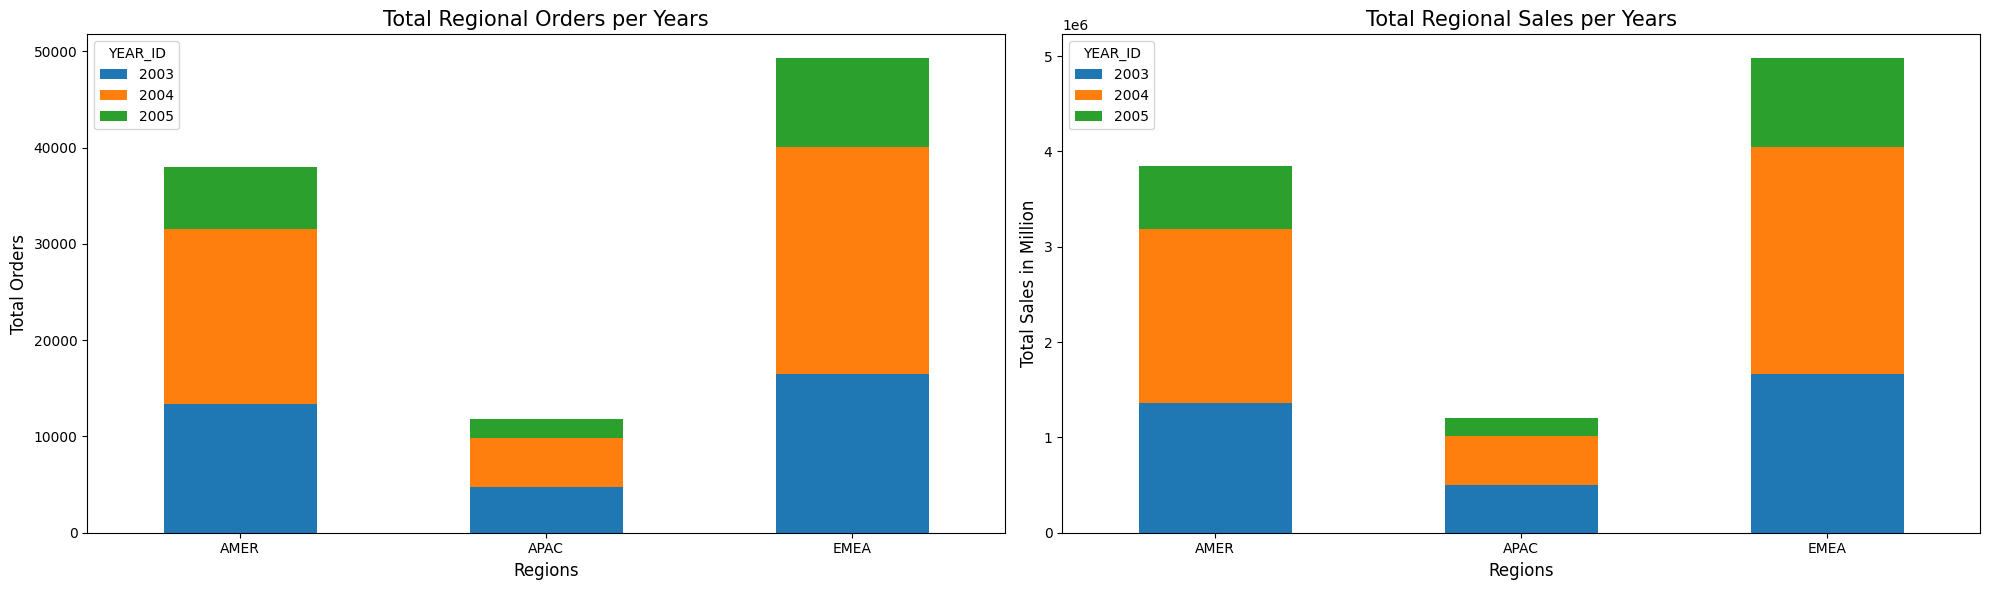

In [196]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df_Regional_Annual_Orders.plot(kind='bar',stacked=True,ax=axs[0])
axs[0].set_xlabel('Regions', fontsize=12)
axs[0].set_ylabel('Total Orders', fontsize=12)
axs[0].set_title("Total Regional Orders per Years", fontsize=15)
axs[0].tick_params(axis='x', rotation=0)

df_Regional_Annual_Sales.plot(kind='bar',stacked=True,ax=axs[1])
axs[1].set_xlabel('Regions', fontsize=12)
axs[1].set_ylabel('Total Sales in Million', fontsize=12)
axs[1].set_title("Total Regional Sales per Years", fontsize=15)
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()

plt.savefig("RegionalOrdersSalesPerYear.png")
plt.show()

# **The first 10 Countries with most Orders and Sales**

In [197]:
df_10Countries_Orders = pd.pivot_table(
    data=df,
    values='QUANTITYORDERED',
    index='COUNTRY',
    aggfunc='sum'
)
df_10Countries_Orders = df_10Countries_Orders.sort_values(by='QUANTITYORDERED', ascending=False).head(10).reset_index()

df_10Countries_Sales = pd.pivot_table(
    data=df,
    values='SALES',
    index='COUNTRY',
    aggfunc='sum'
)
df_10Countries_Sales=df_10Countries_Sales.sort_values(by='SALES', ascending=False).head(10).reset_index()

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_10Countries_Orders,df_10Countries_Sales)

,COUNTRY,QUANTITYORDERED
0,USA,35659
1,Spain,12429
2,France,11090
3,Australia,6246
4,UK,5013
5,Italy,3773
6,Finland,3192
7,Norway,2842
8,Singapore,2760
9,Canada,2293


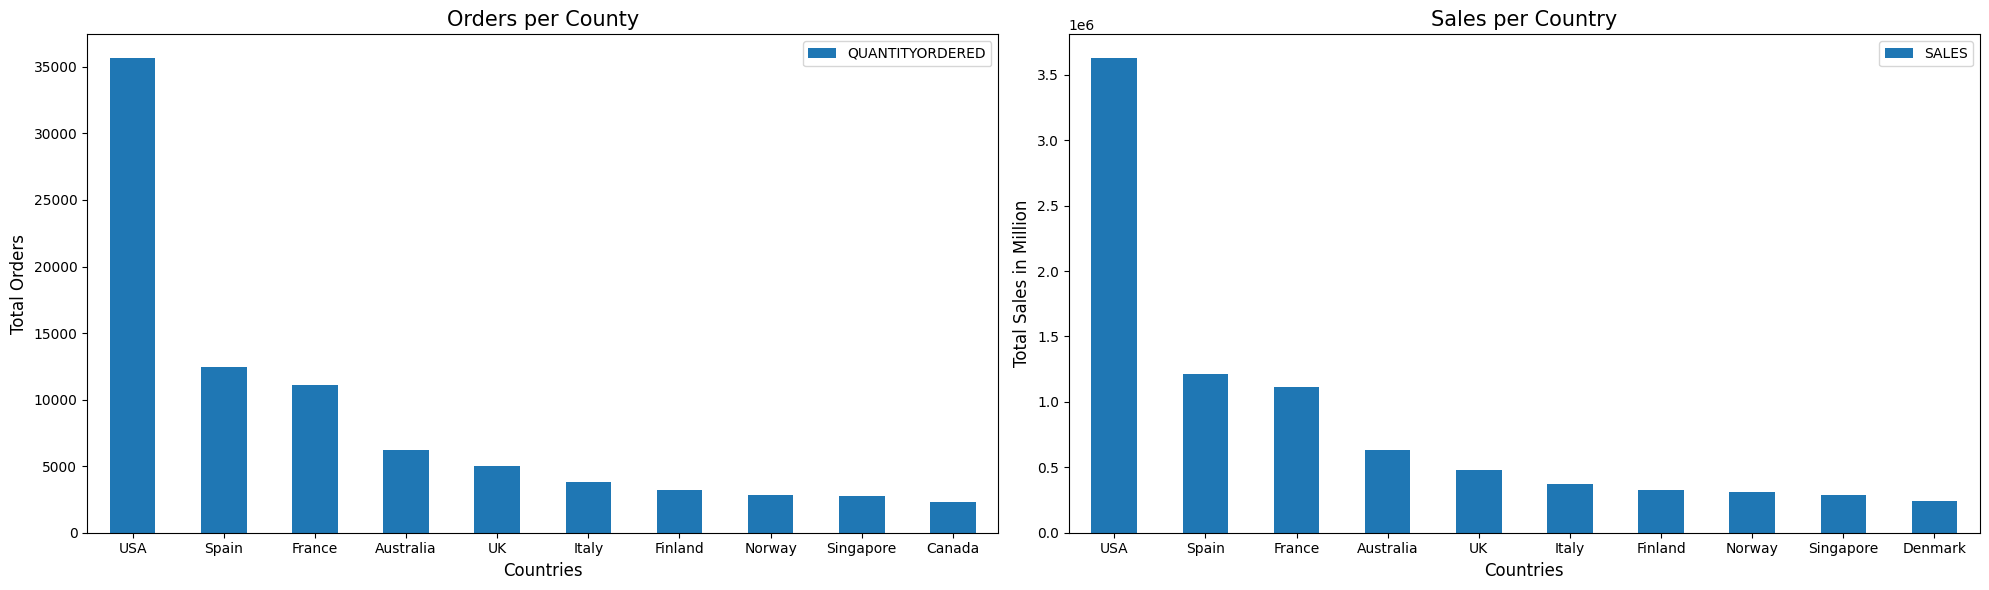

In [198]:
df_10Countries_Orders.set_index('COUNTRY', inplace=True)
df_10Countries_Sales.set_index('COUNTRY', inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df_10Countries_Orders.plot(kind='bar',ax=axs[0])
axs[0].set_xlabel('Countries', fontsize=12)
axs[0].set_ylabel('Total Orders', fontsize=12)
axs[0].set_title("Orders per County", fontsize=15)
axs[0].tick_params(axis='x', rotation=0)

df_10Countries_Sales.plot(kind='bar',ax=axs[1])
axs[1].set_xlabel('Countries', fontsize=12)
axs[1].set_ylabel('Total Sales in Million', fontsize=12)
axs[1].set_title("Sales per Country", fontsize=15)
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()

plt.savefig("OrdersSales PerCountry.png")
plt.show()

# **The first 10 Cities with most Orders and Sales**

In [199]:
df_10Cities_Orders = pd.pivot_table(
    data=df,
    values='QUANTITYORDERED',
    index='CITY',
    aggfunc='sum'
)
df_10Cities_Orders = df_10Cities_Orders.sort_values(by='QUANTITYORDERED', ascending=False).head(10).reset_index()

df_10Cities_Sales = pd.pivot_table(
    data=df,
    values='SALES',
    index='CITY',
    aggfunc='sum'
)
df_10Cities_Sales=df_10Cities_Sales.sort_values(by='SALES', ascending=False).head(10).reset_index()

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_10Cities_Orders,df_10Cities_Sales)

,CITY,QUANTITYORDERED
0,Madrid,10958
1,San Rafael,6366
2,NYC,5294
3,Singapore,2760
4,Paris,2521
5,San Francisco,2139
6,Nantes,2102
7,New Bedford,2043
8,Melbourne,1926
9,Manchester,1778


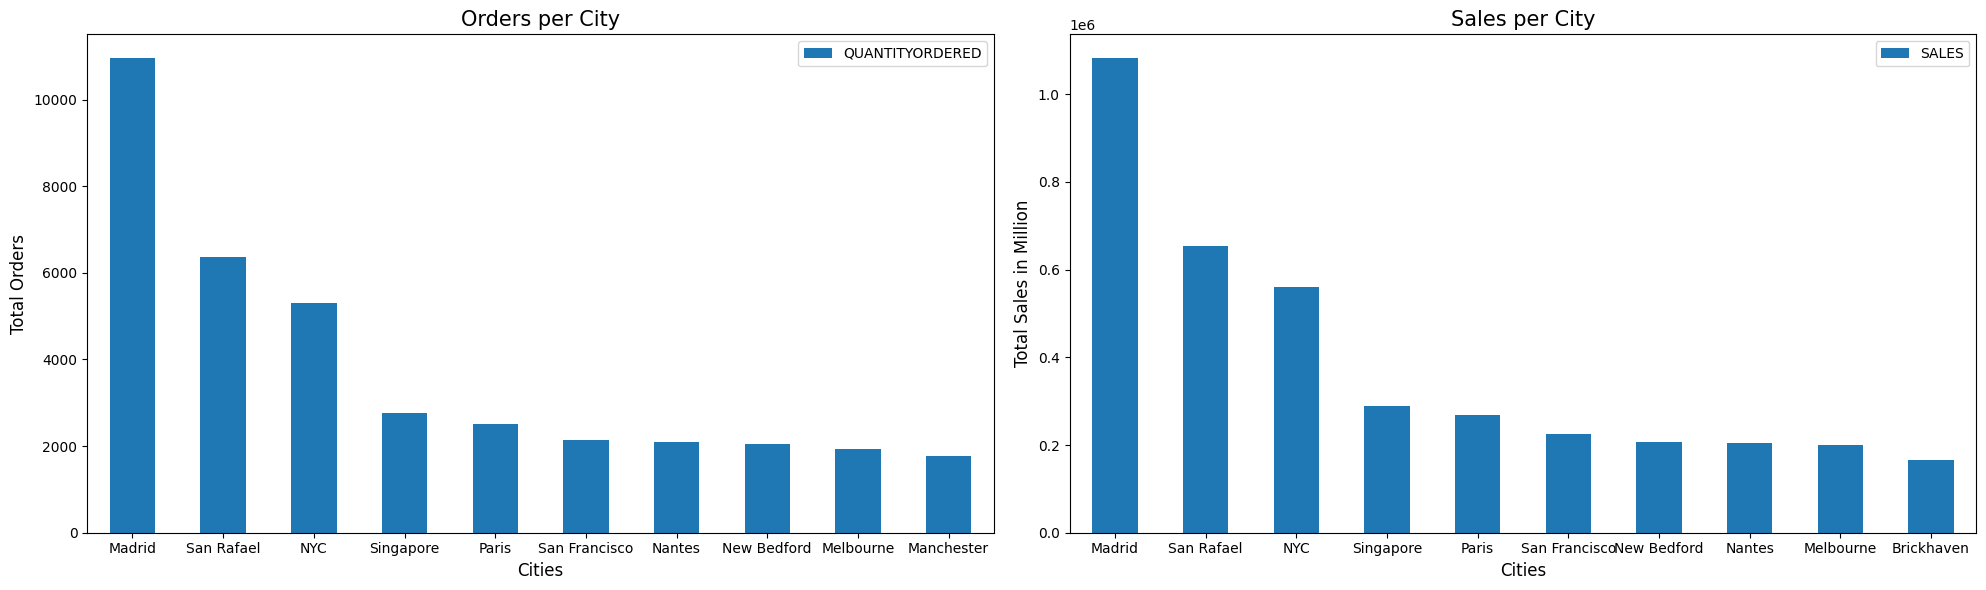

In [200]:
df_10Cities_Orders.set_index('CITY', inplace=True)
df_10Cities_Sales.set_index('CITY', inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df_10Cities_Orders.plot(kind='bar',ax=axs[0])
axs[0].set_xlabel('Cities', fontsize=12)
axs[0].set_ylabel('Total Orders', fontsize=12)
axs[0].set_title("Orders per City", fontsize=15)
axs[0].tick_params(axis='x', rotation=0)

df_10Cities_Sales.plot(kind='bar',ax=axs[1])
axs[1].set_xlabel('Cities', fontsize=12)
axs[1].set_ylabel('Total Sales in Million', fontsize=12)
axs[1].set_title("Sales per City", fontsize=15)
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()

plt.savefig("OrdersSales PerCity.png")
plt.show()

# **The first 10 Products with most Orders and Sales**

In [201]:
df_10Products_Orders = pd.pivot_table(
    data=df,
    values='QUANTITYORDERED',
    index=["PRODUCTCODE",'PRODUCTLINE'],
    aggfunc='sum'
)
df_10Products_Orders = df_10Products_Orders.sort_values(by='QUANTITYORDERED', ascending=False).head(10).reset_index()

df_10Products_Sales = pd.pivot_table(
    data=df,
    values='SALES',
    index=["PRODUCTCODE",'PRODUCTLINE'],
    aggfunc='sum'
)
df_10Products_Sales=df_10Products_Sales.sort_values(by='SALES', ascending=False).head(10).reset_index()

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_10Products_Orders,df_10Products_Sales)

,PRODUCTCODE,PRODUCTLINE,QUANTITYORDERED
0,S18_3232,Classic Cars,1774
1,S24_3856,Classic Cars,1052
2,S18_4600,Trucks and Buses,1031
3,S700_4002,Planes,1029
4,S12_4473,Trucks and Buses,1024
5,S24_3949,Planes,1008
6,S50_1341,Vintage Cars,999
7,S18_1097,Trucks and Buses,999
8,S18_2432,Trucks and Buses,998
9,S18_1342,Vintage Cars,997


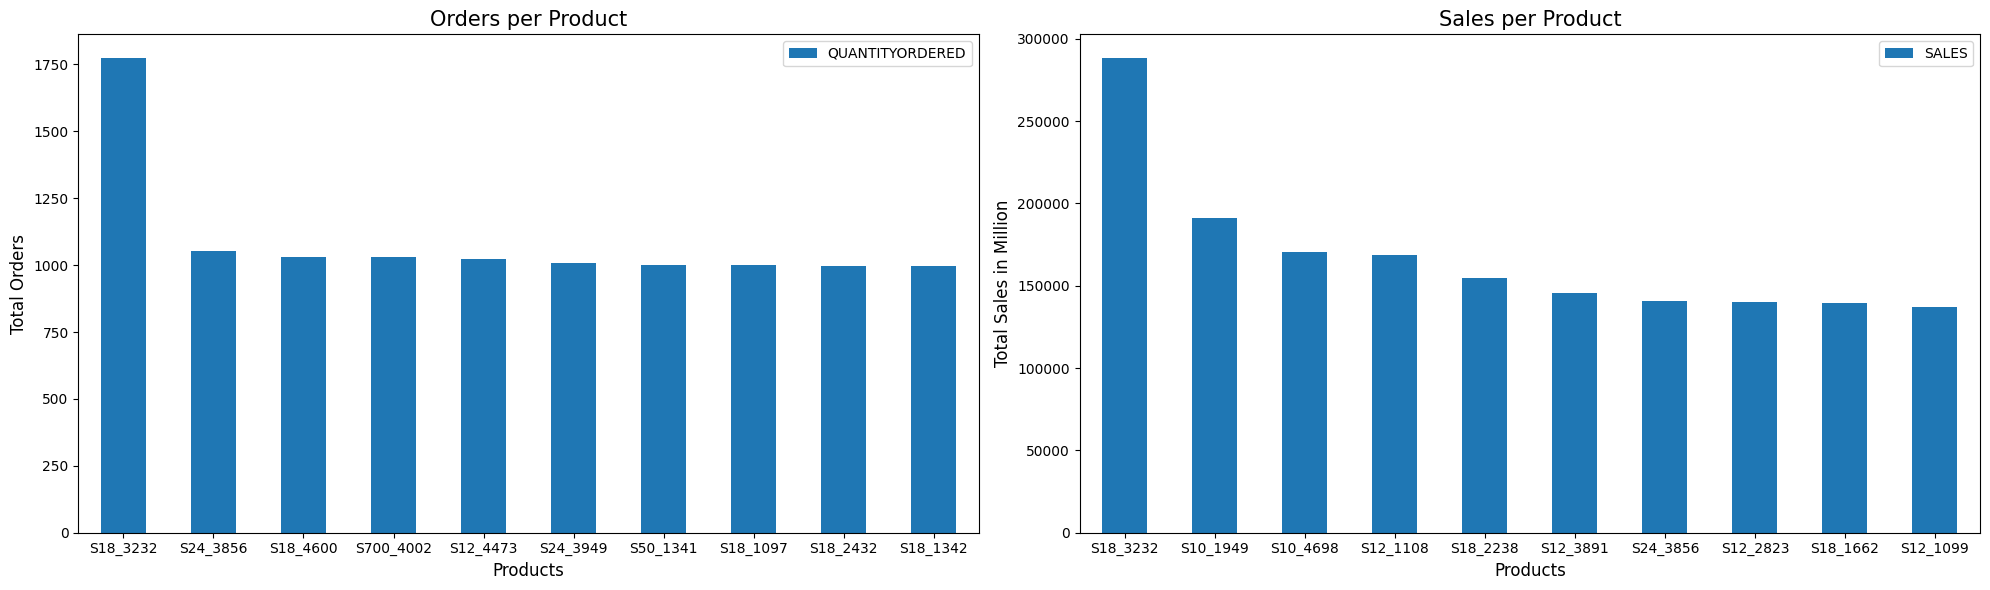

In [202]:
df_10Products_Orders.set_index('PRODUCTCODE', inplace=True)
df_10Products_Sales.set_index('PRODUCTCODE', inplace=True)

#df_10Products_Orders.set_index('PRODUCTLINE', inplace=True)
#df_10Products_Sales.set_index('PRODUCTLINE', inplace=True)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df_10Products_Orders.plot(kind='bar',ax=axs[0])
axs[0].set_xlabel('Products', fontsize=12)
axs[0].set_ylabel('Total Orders', fontsize=12)
axs[0].set_title("Orders per Product", fontsize=15)
axs[0].tick_params(axis='x', rotation=0)

df_10Products_Sales.plot(kind='bar',ax=axs[1])
axs[1].set_xlabel('Products', fontsize=12)
axs[1].set_ylabel('Total Sales in Million', fontsize=12)
axs[1].set_title("Sales per Product", fontsize=15)
axs[1].tick_params(axis='x', rotation=0)

plt.tight_layout()

plt.savefig("OrdersSalesPerProduct.png")
plt.show()

# **Further Analysis per Year**

# Most Popular Product

In [203]:
df_Popular_Product= df[["PRODUCTLINE","PRODUCTCODE",'QUANTITYORDERED']]
df_Popular_Product= df_Popular_Product.groupby("PRODUCTCODE").agg({
    'QUANTITYORDERED': 'sum',
    'PRODUCTLINE': 'first'
}).round(2)

df_Popular_Product_2003= df_2003[["PRODUCTLINE","PRODUCTCODE",'QUANTITYORDERED']]
df_Popular_Product_2003= df_Popular_Product_2003.groupby("PRODUCTCODE").agg({
    'QUANTITYORDERED': 'sum',
    'PRODUCTLINE': 'first'
}).round(2)
df_Popular_Product_2003.rename(columns={'QUANTITYORDERED': 'Orders 2003'}, inplace=True)

df_Popular_Product_2004= df_2004[["PRODUCTLINE","PRODUCTCODE",'QUANTITYORDERED']]
df_Popular_Product_2004= df_Popular_Product_2004.groupby("PRODUCTCODE").agg({
    'QUANTITYORDERED': 'sum',
    'PRODUCTLINE': 'first'
}).round(2)
df_Popular_Product_2004.rename(columns={'QUANTITYORDERED': 'Orders 2004'}, inplace=True)

df_Popular_Product_2005= df_2005[["PRODUCTLINE","PRODUCTCODE",'QUANTITYORDERED']]
df_Popular_Product_2005= df_Popular_Product_2005.groupby("PRODUCTCODE").agg({
    'QUANTITYORDERED': 'sum',
    'PRODUCTLINE': 'first'
}).round(2)
df_Popular_Product_2005.rename(columns={'QUANTITYORDERED': 'Orders 2005'}, inplace=True)

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_Popular_Product.sort_values(by='QUANTITYORDERED', ascending=False).head(10).reset_index(),df_Popular_Product_2003.sort_values(by='Orders 2003', ascending=False).head(10).reset_index(),df_Popular_Product_2004.sort_values(by='Orders 2004', ascending=False).head(10).reset_index(),df_Popular_Product_2005.sort_values(by='Orders 2005', ascending=False).head(10).reset_index())

,PRODUCTCODE,QUANTITYORDERED,PRODUCTLINE
0,S18_3232,1774,Classic Cars
1,S24_3856,1052,Classic Cars
2,S18_4600,1031,Trucks and Buses
3,S700_4002,1029,Planes
4,S12_4473,1024,Trucks and Buses
5,S24_3949,1008,Planes
6,S50_1341,999,Vintage Cars
7,S18_1097,999,Trucks and Buses
8,S18_2432,998,Trucks and Buses
9,S18_1342,997,Vintage Cars


# Product with Highest Sales

In [204]:
df_Sales_Product= df[["PRODUCTLINE","PRODUCTCODE",'SALES']]
df_Sales_Product= df_Sales_Product.groupby("PRODUCTCODE").agg({
    'SALES': 'sum',
    'PRODUCTLINE': 'first'
}).round(2)

df_Sales_Product_2003= df_2003[["PRODUCTLINE","PRODUCTCODE",'SALES']]
df_Sales_Product_2003= df_Sales_Product_2003.groupby("PRODUCTCODE").agg({
    'SALES': 'sum',
    'PRODUCTLINE': 'first'
}).round(2)
df_Sales_Product_2003.rename(columns={'SALES': 'Sales 2003'}, inplace=True)


df_Sales_Product_2004= df_2004[["PRODUCTLINE","PRODUCTCODE",'SALES']]
df_Sales_Product_2004= df_Sales_Product_2004.groupby("PRODUCTCODE").agg({
    'SALES': 'sum',
    'PRODUCTLINE': 'first'
}).round(2)
df_Sales_Product_2004.rename(columns={'SALES': 'Sales 2004'}, inplace=True)

df_Sales_Product_2005= df_2005[["PRODUCTLINE","PRODUCTCODE",'SALES']]
df_Sales_Product_2005= df_Sales_Product_2005.groupby("PRODUCTCODE").agg({
    'SALES': 'sum',
    'PRODUCTLINE': 'first'
}).round(2)
df_Sales_Product_2005.rename(columns={'SALES': 'Sales 2005'}, inplace=True)

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_Sales_Product.sort_values(by='SALES', ascending=False).head(10).reset_index(),df_Sales_Product_2003.sort_values(by='Sales 2003', ascending=False).head(10).reset_index(),df_Sales_Product_2004.sort_values(by='Sales 2004', ascending=False).head(10).reset_index(),df_Sales_Product_2005.sort_values(by='Sales 2005', ascending=False).head(10).reset_index())

,PRODUCTCODE,SALES,PRODUCTLINE
0,S18_3232,288245.42,Classic Cars
1,S10_1949,191073.03,Classic Cars
2,S10_4698,170401.07,Motorcycles
3,S12_1108,168585.32,Classic Cars
4,S18_2238,154623.95,Classic Cars
5,S12_3891,145332.04,Classic Cars
6,S24_3856,140626.90,Classic Cars
7,S12_2823,140006.16,Motorcycles
8,S18_1662,139421.97,Planes
9,S12_1099,137177.01,Classic Cars


# Cities with the most Orders

In [205]:
df_Orders_City= df[["COUNTRY","CITY",'QUANTITYORDERED']]
df_Orders_City= df_Orders_City.groupby("CITY").agg({
    'QUANTITYORDERED': 'sum',
    'COUNTRY': 'first'
}).round(2)

df_Orders_City_2003= df_2003[["COUNTRY","CITY",'QUANTITYORDERED']]
df_Orders_City_2003= df_Orders_City_2003.groupby("CITY").agg({
    'QUANTITYORDERED': 'sum',
    'COUNTRY': 'first'
}).round(2)
df_Orders_City_2003.rename(columns={'QUANTITYORDERED': 'Orders 2003'}, inplace=True)

df_Orders_City_2004= df_2004[["COUNTRY","CITY",'QUANTITYORDERED']]
df_Orders_City_2004= df_Orders_City_2004.groupby("CITY").agg({
    'QUANTITYORDERED': 'sum',
    'COUNTRY': 'first'
}).round(2)
df_Orders_City_2004.rename(columns={'QUANTITYORDERED': 'Orders 2004'}, inplace=True)

df_Orders_City_2005= df_2005[["COUNTRY","CITY",'QUANTITYORDERED']]
df_Orders_City_2005= df_Orders_City_2005.groupby("CITY").agg({
    'QUANTITYORDERED': 'sum',
    'COUNTRY': 'first'
}).round(2)
df_Orders_City_2005.rename(columns={'QUANTITYORDERED': 'Orders 2005'}, inplace=True)

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_Orders_City.sort_values(by='QUANTITYORDERED', ascending=False).head(10).reset_index(),df_Orders_City_2003.sort_values(by='Orders 2003', ascending=False).head(10).reset_index(),df_Orders_City_2004.sort_values(by='Orders 2004', ascending=False).head(10).reset_index(),df_Orders_City_2005.sort_values(by='Orders 2005', ascending=False).head(10).reset_index())

,CITY,QUANTITYORDERED,COUNTRY
0,Madrid,10958,Spain
1,San Rafael,6366,USA
2,NYC,5294,USA
3,Singapore,2760,Singapore
4,Paris,2521,France
5,San Francisco,2139,USA
6,Nantes,2102,France
7,New Bedford,2043,USA
8,Melbourne,1926,Australia
9,Manchester,1778,UK


# Cities with Highest Sales

In [206]:
df_Sales_City= df[["COUNTRY","CITY",'SALES']]
df_Sales_City= df_Sales_City.groupby("CITY").agg({
    'SALES': 'sum',
    'COUNTRY': 'first'
}).round(2)

df_Sales_City_2003= df_2003[["COUNTRY","CITY",'SALES']]
df_Sales_City_2003= df_Sales_City_2003.groupby("CITY").agg({
    'SALES': 'sum',
    'COUNTRY': 'first'
}).round(2)
df_Sales_City_2003.rename(columns={'SALES': 'Sales 2003'}, inplace=True)

df_Sales_City_2004= df_2004[["COUNTRY","CITY",'SALES']]
df_Sales_City_2004= df_Sales_City_2004.groupby("CITY").agg({
    'SALES': 'sum',
    'COUNTRY': 'first'
}).round(2)
df_Sales_City_2004.rename(columns={'SALES': 'Sales 2004'}, inplace=True)

df_Sales_City_2005= df_2005[["COUNTRY","CITY",'SALES']]
df_Sales_City_2005= df_Sales_City_2005.groupby("CITY").agg({
    'SALES': 'sum',
    'COUNTRY': 'first'
}).round(2)
df_Sales_City_2005.rename(columns={'SALES': 'Sales 2005'}, inplace=True)

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_Sales_City.sort_values(by='SALES', ascending=False).head(10).reset_index(),df_Sales_City_2003.sort_values(by='Sales 2003', ascending=False).head(10).reset_index(),df_Sales_City_2004.sort_values(by='Sales 2004', ascending=False).head(10).reset_index(),df_Sales_City_2005.sort_values(by='Sales 2005', ascending=False).head(10).reset_index())

,CITY,SALES,COUNTRY
0,Madrid,1082551.44,Spain
1,San Rafael,654858.06,USA
2,NYC,560787.77,USA
3,Singapore,288488.41,Singapore
4,Paris,268944.68,France
5,San Francisco,224358.68,USA
6,New Bedford,207874.86,USA
7,Nantes,204304.86,France
8,Melbourne,200995.41,Australia
9,Brickhaven,165255.20,USA


# The first 3 Cities and The First 3 Products with most Sales

pivot_TopOfTheTop = pd.pivot_table(
    data=df_TopOfTheTop,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    columns=['YEAR_ID','TERRITORY'],
    aggfunc='sum'
)

In [207]:
#Madrid
Spain_filtered_df = df[df['COUNTRY']=='Spain']
Madrid_filtered_df=Spain_filtered_df[Spain_filtered_df['CITY']=='Madrid']
df_MadridTop3=Madrid_filtered_df[['CITY','SALES','PRODUCTLINE','PRODUCTCODE','QUANTITYORDERED']]

df_MadridTop3= df_MadridTop3.groupby("PRODUCTCODE").agg({
    'SALES': 'sum',
    'QUANTITYORDERED':'sum',
    'CITY': 'first',
    'PRODUCTLINE':'first'
}).round(2).sort_values(by='SALES', ascending=False).head(3).reset_index()

#NYC
USA_filtered_df = df[df['COUNTRY']=='USA']
NYC_filtered_df=USA_filtered_df[USA_filtered_df['CITY']=='NYC']
df_NYCTop3=NYC_filtered_df[['CITY','SALES','PRODUCTLINE','PRODUCTCODE','QUANTITYORDERED']]

df_NYCTop3= df_NYCTop3.groupby("PRODUCTCODE").agg({
    'SALES': 'sum',
    'QUANTITYORDERED':'sum',
    'CITY': 'first',
    'PRODUCTLINE':'first'
}).round(2).sort_values(by='SALES', ascending=False).head(3).reset_index()

#San Rafael
SanRaf_filtered_df=USA_filtered_df[USA_filtered_df['CITY']=='San Rafael']
df_SanRafTop3=SanRaf_filtered_df[['CITY','SALES','PRODUCTLINE','PRODUCTCODE','QUANTITYORDERED']]

df_SanRafTop3= df_SanRafTop3.groupby("PRODUCTCODE").agg({
    'SALES': 'sum',
    'QUANTITYORDERED':'sum',
    'CITY': 'first',
    'PRODUCTLINE':'first'    
}).round(2).sort_values(by='SALES', ascending=False).head(3).reset_index()

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(df_MadridTop3,df_NYCTop3,df_SanRafTop3)


,PRODUCTCODE,SALES,QUANTITYORDERED,CITY,PRODUCTLINE
0,S18_3232,50636.66,308,Madrid,Classic Cars
1,S24_2300,27100.44,204,Madrid,Trucks and Buses
2,S18_2795,23968.02,154,Madrid,Vintage Cars
,PRODUCTCODE,SALES,QUANTITYORDERED,CITY,PRODUCTLINE
0,S18_2238,33009.99,202,NYC,Classic Cars
1,S18_4027,26041.67,188,NYC,Classic Cars
2,S10_4698,18957.65,92,NYC,Motorcycles
,PRODUCTCODE,SALES,QUANTITYORDERED,CITY,PRODUCTLINE
0,S12_3891,22600.93,137,San Rafael,Classic Cars
1,S12_1108,22478.84,140,San Rafael,Classic Cars


--------------------------

# **Case Studies Motorcicles**
# Table of Motorbikes' Prices and Orders during the Years

In [208]:
df_Motorcicles= df[df["PRODUCTLINE"]=='Motorcycles']
df_Motorcicles_2003=df_Motorcicles[df_Motorcicles['YEAR_ID']==2003]
df_Motorcicles_2004=df_Motorcicles[df_Motorcicles['YEAR_ID']==2004]
df_Motorcicles_2005=df_Motorcicles[df_Motorcicles['YEAR_ID']==2005]

df_Motorcicle_2003_Prices=pd.pivot_table(
    data=df_Motorcicles_2003,
    values='PRICEEACH',
    index='MONTH_ID',
    aggfunc='mean'
)

df_Motorcicle_2003_Orders=pd.pivot_table(
    data=df_Motorcicles_2003,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    aggfunc='sum'
)

df_Motorcicle_2003_Compare = pd.merge(df_Motorcicle_2003_Prices, df_Motorcicle_2003_Orders, on="MONTH_ID") 

df_Motorcicle_2003_Compare.rename(columns={'PRICEEACH': 'Price 2003'}, inplace=True)
df_Motorcicle_2003_Compare.rename(columns={'QUANTITYORDERED': 'Orders 2003'}, inplace=True)

df_Motorcicle_2003_Compare.round(2).reset_index()

df_Motorcicle_2004_Prices=pd.pivot_table(
    data=df_Motorcicles_2004,
    values='PRICEEACH',
    index='MONTH_ID',
    aggfunc='mean'
)

df_Motorcicle_2004_Orders=pd.pivot_table(
    data=df_Motorcicles_2004,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    aggfunc='sum'
)

df_Motorcicle_2004_Compare = pd.merge(df_Motorcicle_2004_Prices, df_Motorcicle_2004_Orders, on="MONTH_ID") 

df_Motorcicle_2004_Compare.rename(columns={'PRICEEACH': 'Price 2004'}, inplace=True)
df_Motorcicle_2004_Compare.rename(columns={'QUANTITYORDERED': 'Orders 2004'}, inplace=True)

df_Motorcicle_2005_Prices=pd.pivot_table(
    data=df_Motorcicles_2005,
    values='PRICEEACH',
    index='MONTH_ID',
    aggfunc='mean'
)

df_Motorcicle_2005_Orders=pd.pivot_table(
    data=df_Motorcicles_2005,
    values='QUANTITYORDERED',
    index='MONTH_ID',
    aggfunc='sum'
)

df_Motorcicle_2005_Compare = pd.merge(df_Motorcicle_2005_Prices, df_Motorcicle_2005_Orders, on="MONTH_ID") 

df_Motorcicle_2005_Compare.rename(columns={'PRICEEACH': 'Price 2005'}, inplace=True)
df_Motorcicle_2005_Compare.rename(columns={'QUANTITYORDERED': 'Orders 2005'}, inplace=True)


df_Motorcicles = pd.merge(df_Motorcicle_2003_Compare, df_Motorcicle_2004_Compare, on='MONTH_ID',how='outer')
df_Motorcicles = pd.merge(df_Motorcicles, df_Motorcicle_2005_Compare, on='MONTH_ID',how='outer')
df_Motorcicles.reset_index().round(2)

,MONTH_ID,Price 2003,Orders 2003,Price 2004,Orders 2004,Price 2005,Orders 2005
0,1,NaN,NaN,78.62,460.0,85.93,377.0
1,2,92.80,229.0,82.82,493.0,88.43,429.0
2,3,70.62,170.0,NaN,NaN,80.20,513.0
3,4,89.39,212.0,83.37,361.0,83.37,579.0
4,5,73.46,251.0,83.70,466.0,93.60,336.0
5,6,100.00,23.0,80.08,493.0,NaN,NaN
6,7,80.93,408.0,88.33,214.0,NaN,NaN
7,8,81.98,440.0,78.31,675.0,NaN,NaN
8,9,67.14,47.0,81.20,430.0,NaN,NaN
9,10,84.41,627.0,79.61,427.0,NaN,NaN


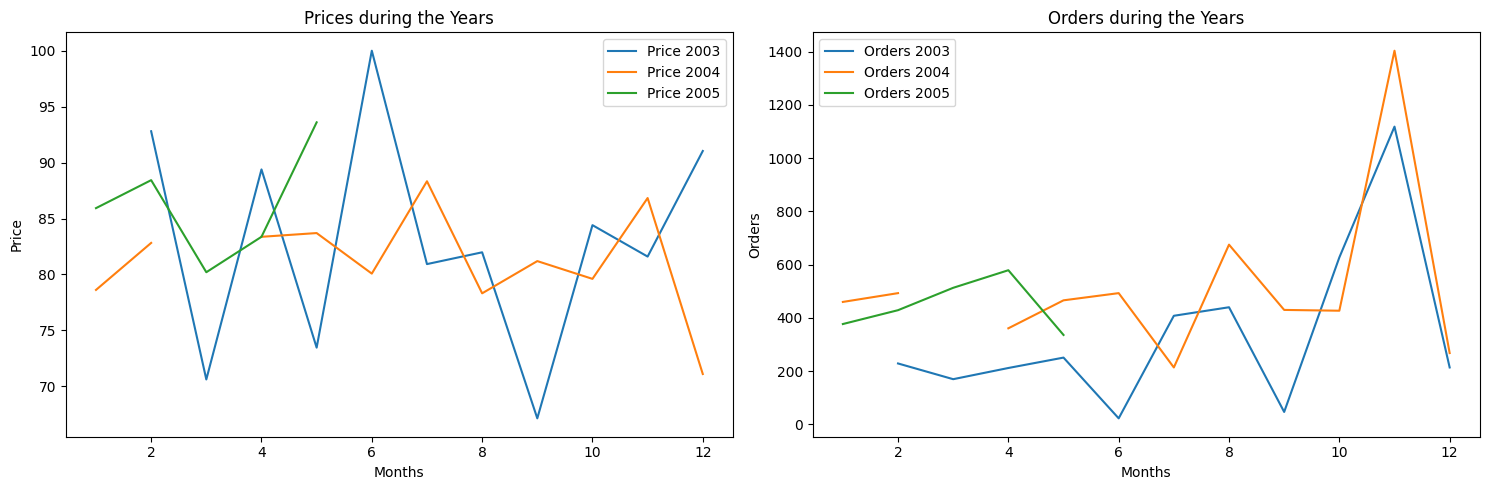

In [209]:
fig, axs = plt.subplots(1,2,figsize=(15, 5))

df_Motorcicles[['Price 2003','Price 2004','Price 2005']].plot(kind='line',ax=axs[0])
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Price')
axs[0].set_title("Prices during the Years")

df_Motorcicles[['Orders 2003','Orders 2004','Orders 2005']].plot(kind='line',ax=axs[1])
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Orders')
axs[1].set_title("Orders during the Years")

plt.tight_layout()

plt.savefig("MotorbikePricesOrdersDuringTheYears.png")
plt.show()

# Correlations Between Prices and Orders for Motorbikes

In [210]:
Cor_Motor_2003 = df_Motorcicle_2003_Compare[['Price 2003', 'Orders 2003']].corr()
Cor_Motor_2004 = df_Motorcicle_2004_Compare[['Price 2004', 'Orders 2004']].corr()
Cor_Motor_2005 = df_Motorcicle_2005_Compare[['Price 2005', 'Orders 2005']].corr()

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)
    
display_side_by_side(Cor_Motor_2003,Cor_Motor_2004,Cor_Motor_2005)

,Price 2003,Orders 2003
Price 2003,1.00000,-0.05259
Orders 2003,-0.05259,1.00000
,Price 2004,Orders 2004
Price 2004,1.000000,0.317512
Orders 2004,0.317512,1.000000
,Price 2005,Orders 2005
Price 2005,1.000000,-0.798223
Orders 2005,-0.798223,1.000000


# **Findings**

* The Sales are identical to Orders, with their correlation to be nearly 1.
* The Reduction % (between the Average Product Price and Average MSRP) and the Sales | Quantity Orders is -0.88|0.85. That shows a trend, that a product meets high sales, its price goes lower than the MSRP. So Classic Cars with the highest Orders also have the Biggest Reduction and Trains the highest Orders have also Orders have the Biggest Reduction and Trains that have the least orders price increase above the MSRP. 

    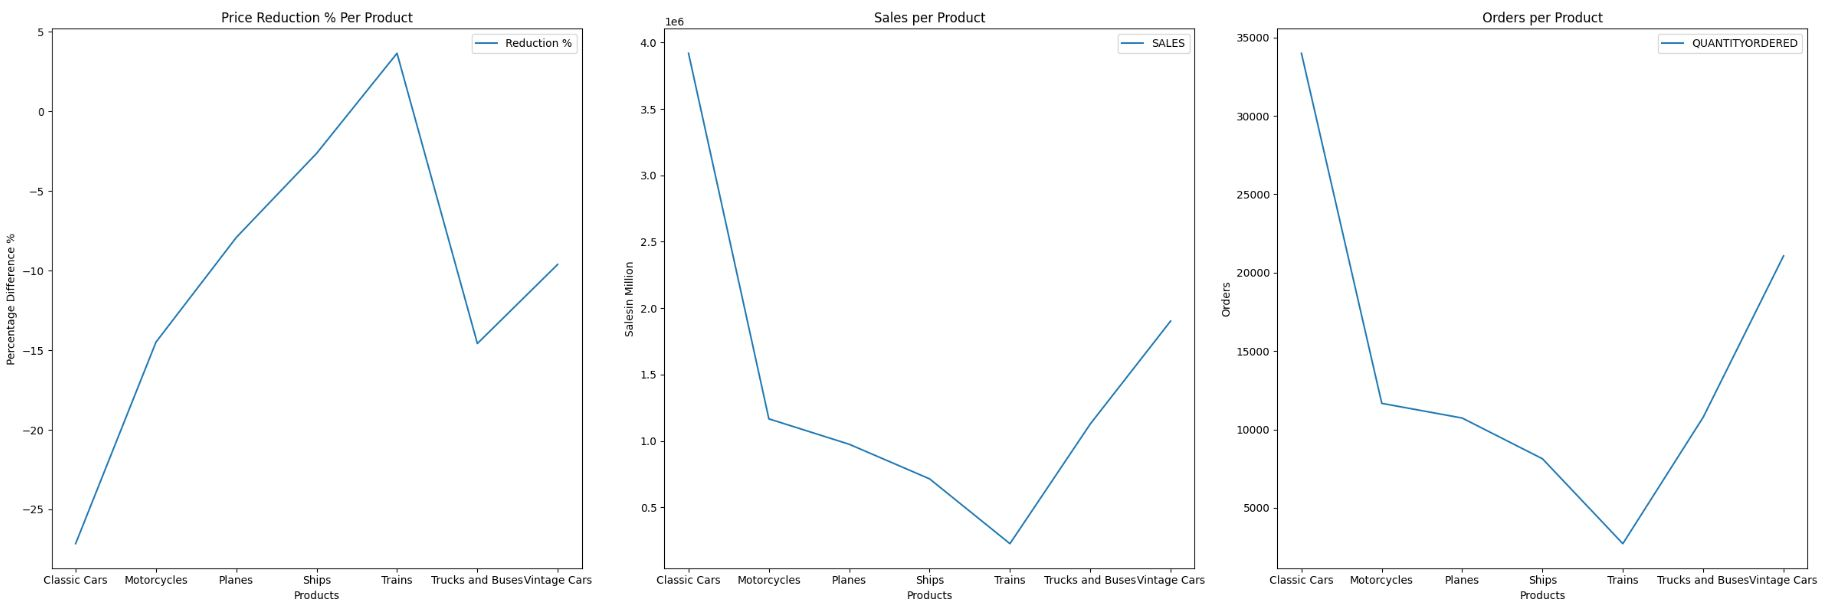
    
* We see that the higher the Sales as higher the Reductions up to 55%. But also, The Lowest sales have charged up to 33%.

    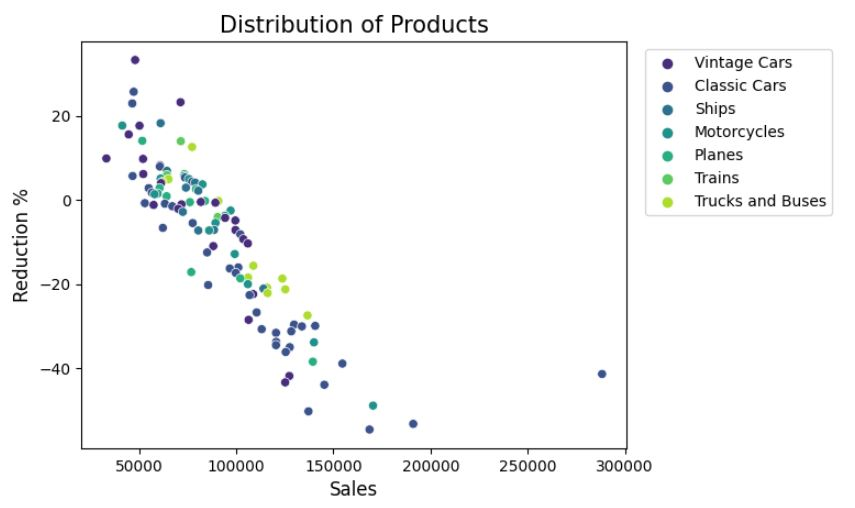

* The Dealsize is related only to the size of Sales:
    * 3000 > Small
    * 7000 > Medium > 3000
    * Large  > 7000
    
    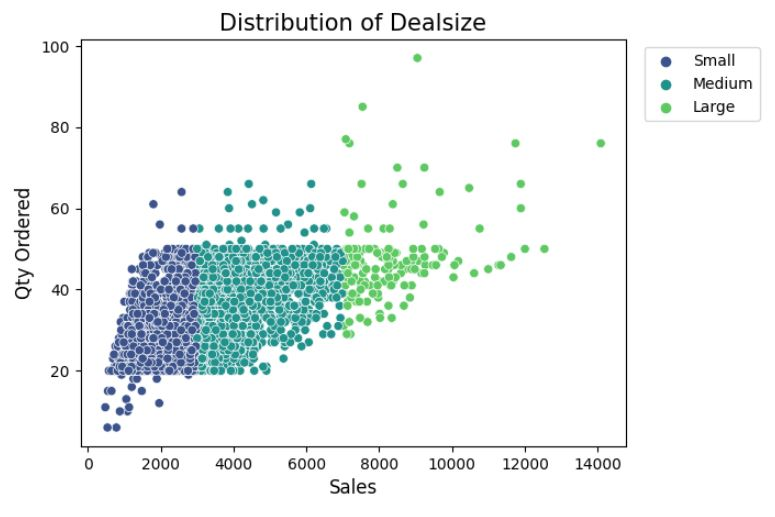
    
* November is the month for 2003 and 2004 with the highest Sales and Orders.

    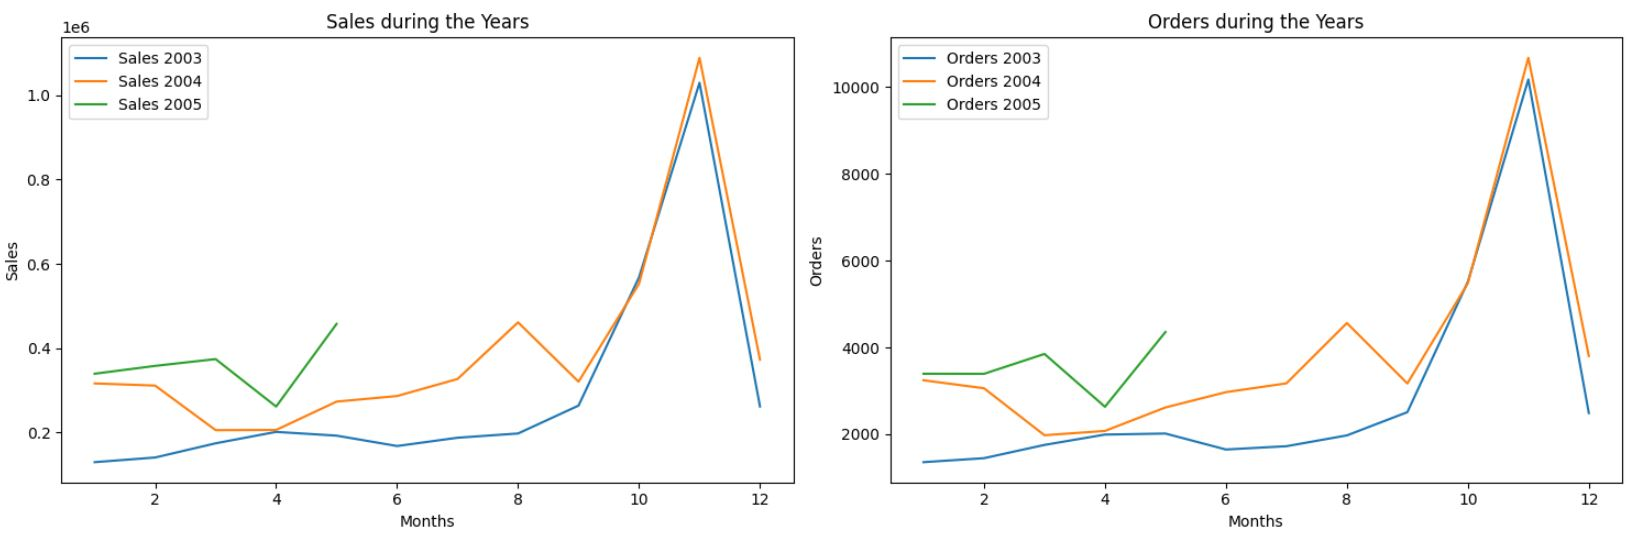
    
* Sales Distribution per Product line

    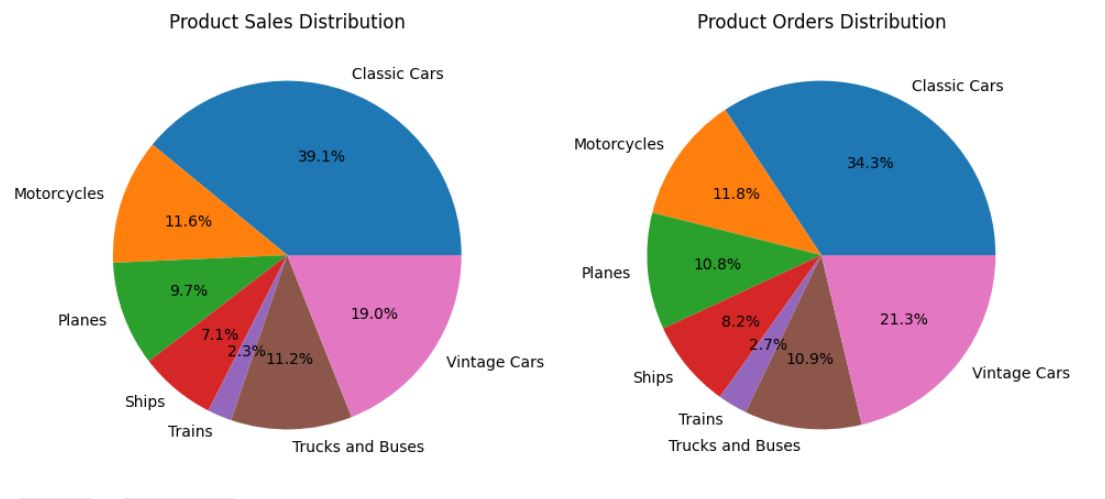
    
* The Top 10 Products (Productcode) per Total Sales

    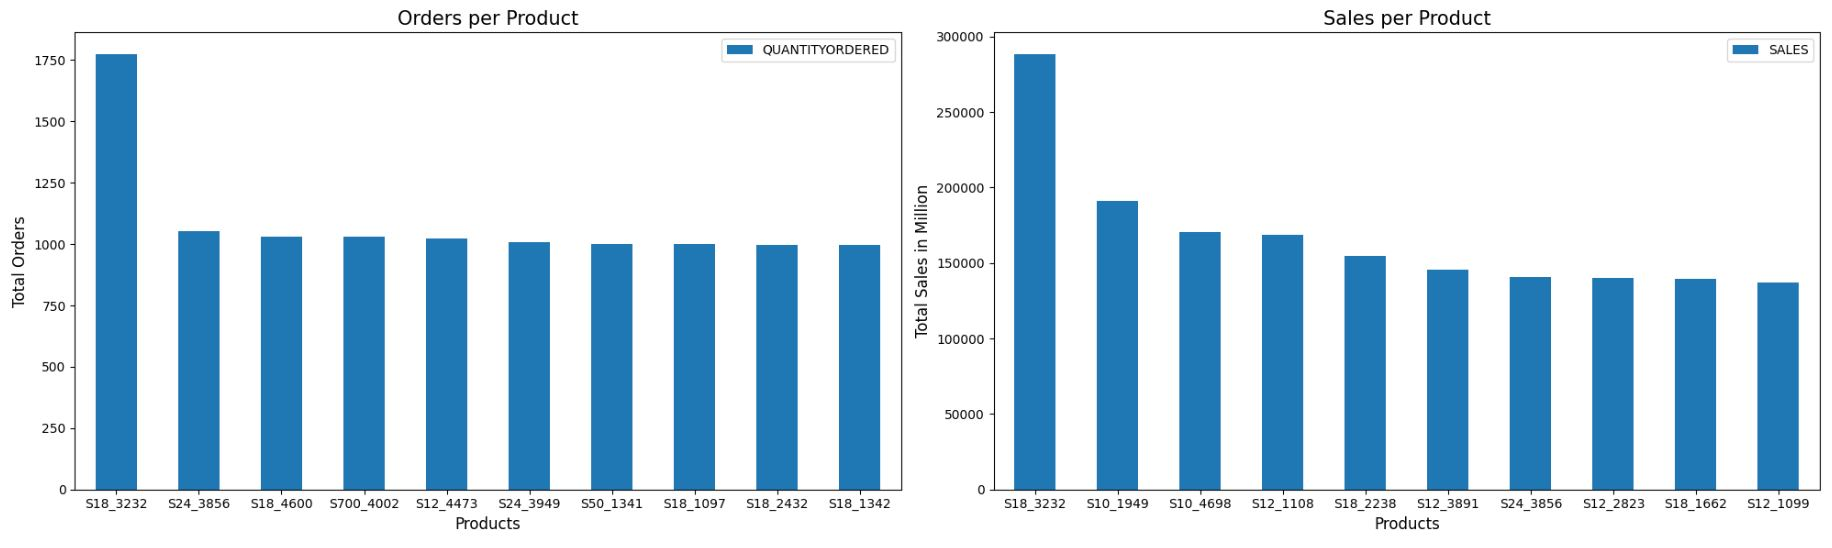
    
* Sales Distribution per Region:

    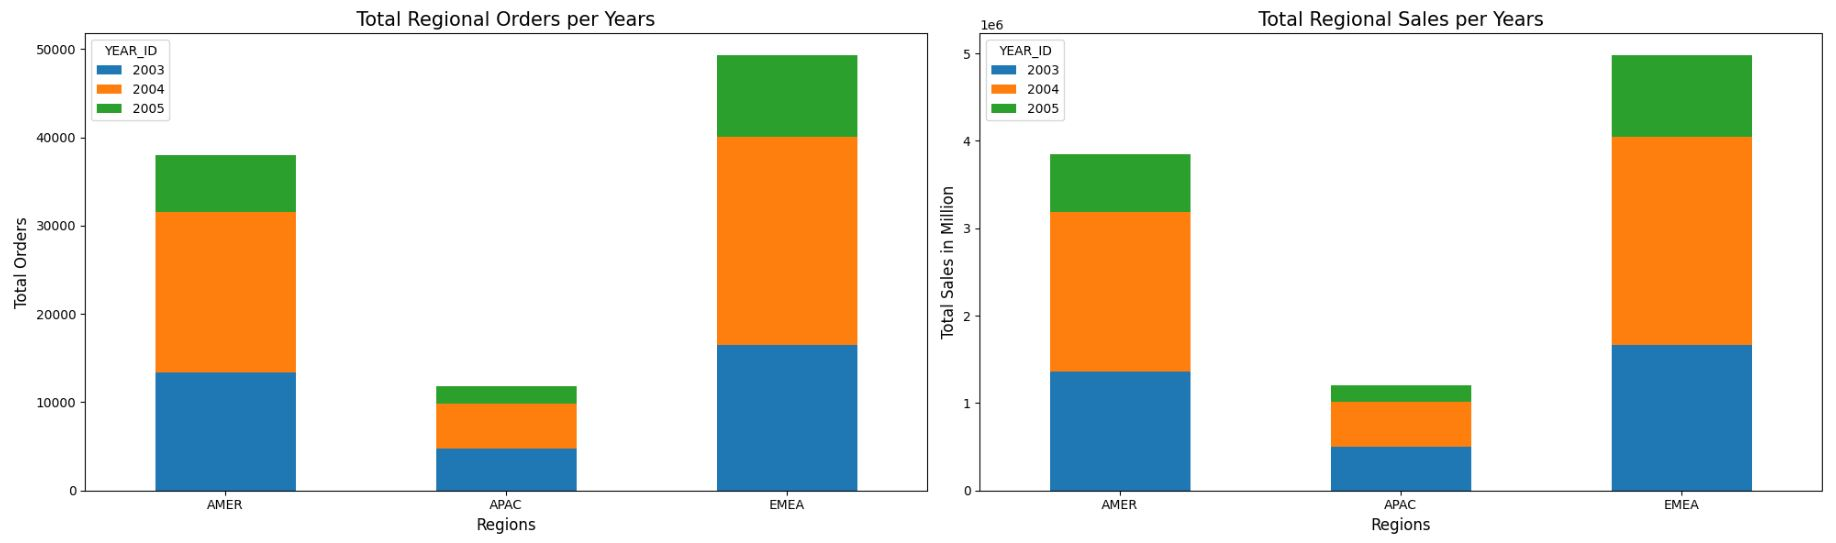
    
* The Top 10 Countries with the highest Total Sales

    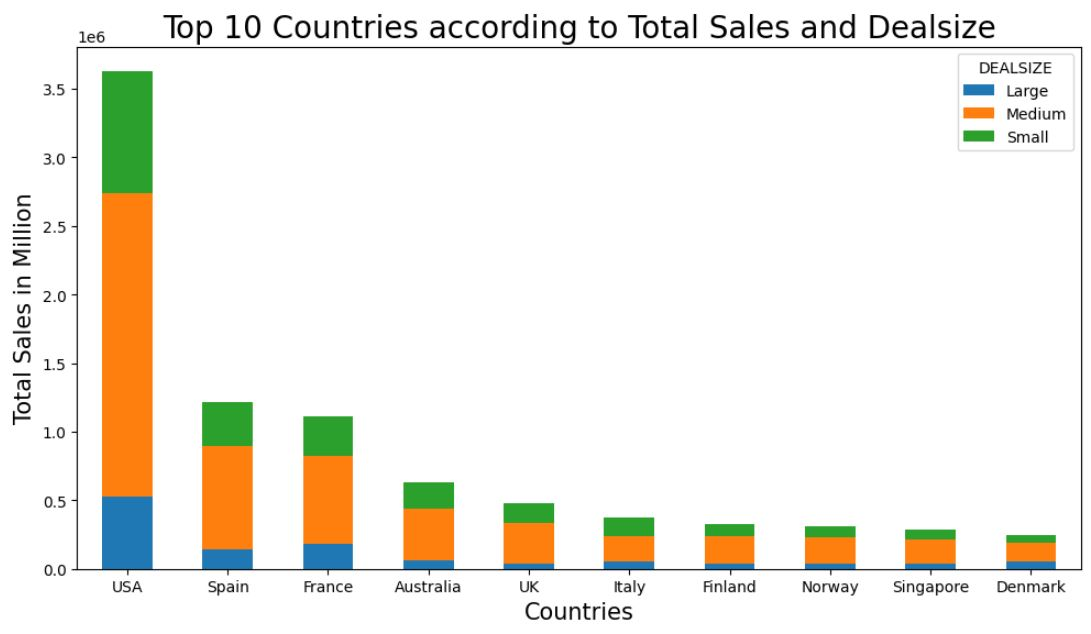
    
* The prices for the same Product (code) seem to change irrelevant the time. It can go up and down. I tried to figure out if it is related to the orders, but still, there is no connection.  

    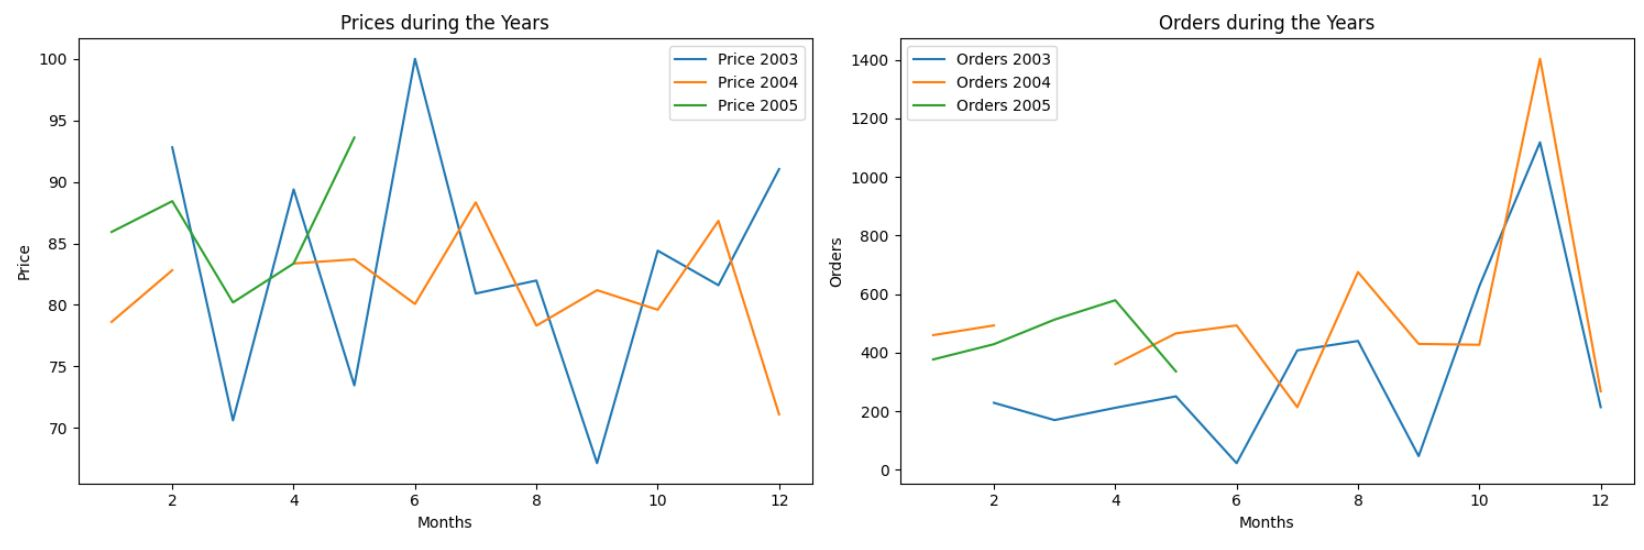